# IMPORT

In [4]:
import pandas as pd
pd.set_option('display.max_columns', 50)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split

# DEFINE

In [5]:
DATA_PATH = '../data/'

# PREPARETION

In [6]:
# train
train = pd.read_csv(DATA_PATH+'train_clean.csv',
                    dtype={'floors': str,
                           'total_floors': str})
# test
test = pd.read_csv(DATA_PATH+'test_clean.csv',
                    dtype={'floors': str,
                           'total_floors': str})

In [7]:
train.shape

(98459, 28)

In [8]:
test.shape

(42192, 28)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98459 entries, 0 to 98458
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   page               98459 non-null  object 
 1   description        98459 non-null  object 
 2   flat_type          98459 non-null  object 
 3   object_type        98459 non-null  object 
 4   rooms              98459 non-null  object 
 5   floors             98459 non-null  object 
 6   square             98459 non-null  float64
 7   kitchen_square     55863 non-null  float64
 8   live_square        61432 non-null  float64
 9   price              98459 non-null  float64
 10  build_matireal     98459 non-null  object 
 11  public_date        98459 non-null  object 
 12  update_date        98459 non-null  object 
 13  district_rating    98459 non-null  object 
 14  district           98459 non-null  object 
 15  underground        98459 non-null  object 
 16  eco_rating         984

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42192 entries, 0 to 42191
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   page               42192 non-null  object 
 1   description        42192 non-null  object 
 2   flat_type          42192 non-null  object 
 3   object_type        42192 non-null  object 
 4   rooms              42192 non-null  object 
 5   floors             42192 non-null  object 
 6   square             42192 non-null  float64
 7   kitchen_square     23937 non-null  float64
 8   live_square        26304 non-null  float64
 9   price              42192 non-null  float64
 10  build_matireal     42192 non-null  object 
 11  public_date        42192 non-null  object 
 12  update_date        42192 non-null  object 
 13  district_rating    42192 non-null  object 
 14  district           42192 non-null  object 
 15  underground        42192 non-null  object 
 16  eco_rating         421

Для удобвства анализа объединяем тренировочные и тестовые данные, пометив где какие.

In [11]:
train['sample'] = 1 # тренировочные
test['sample'] = 0 # тестовые

df = train.append(test, sort=False).reset_index(drop=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140651 entries, 0 to 140650
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   page               140651 non-null  object 
 1   description        140651 non-null  object 
 2   flat_type          140651 non-null  object 
 3   object_type        140651 non-null  object 
 4   rooms              140651 non-null  object 
 5   floors             140651 non-null  object 
 6   square             140651 non-null  float64
 7   kitchen_square     79800 non-null   float64
 8   live_square        87736 non-null   float64
 9   price              140651 non-null  float64
 10  build_matireal     140651 non-null  object 
 11  public_date        140651 non-null  object 
 12  update_date        140651 non-null  object 
 13  district_rating    140651 non-null  object 
 14  district           140651 non-null  object 
 15  underground        140651 non-null  object 
 16  ec

# FEATURES DESCRIPTION

**price (Target)** - Цена жилого помещения. Наш таргет.

**page** - ссылка на объявление.

**description** - описание из объявления, составленное пользователем (риэлтор или собственик).

**flat_type** - тип жилого помешения.

**object_type** - тип здания, в котором находится жилое помещение.

**rooms** - количество комнат.

**floors** - этаж, на котором находится жилое помещение.

**total_floors** - общее количество этажей в доме.

**square** - общая площадь жилого помещения.

**kitchen_square** - площадь кухни.

**live_square** - жилая площадь, т.е. без учета кухни и санузла.

**build_matireal** - материал, из которого сделано здание.

**public_date** - дата публикации объявления.

**update_date** - дата последнего обновления объявления.

**district_rating** - рейтинг района, в котором находится жилое помещение.

**district** - район в котором находится жилое помещение.

**underground** - расстояние до ближайщей станции метро.

**metro_station** - ближайщая станция метро.

**eco_rating** - экологический рейтинг района.

**clear_rating** - рейтинг чистоты района.

**gkh_rating** - рейтинг ЖКХ района.

**neighbor_rating** - рейтинг соседей.

**kids_rating** - рейтинг условия для детей.

**sport_rest_rating** - рейтинг спорта и отдыха.

**shop_rating** - рейтинг магазинов.

**traffic_rating** - рейтинг транспорта.

**secure_rating** - рейтинг безопасности.

**life_price_rating** - рейтинг стоимости жизни.

**Числовые признак (4):** price, square, kitchen_square, live_square

**Категориальные признаки (24):** page, description, flat_type, object_type, rooms, floors, total_floors, build_matireal,
public_date, update_date, district_rating, district, underground, metro_station, eco_rating, clear_rating, gkh_rating,
neighbor_rating, kids_rating, sport_rest_rating, shop_rating, traffic_rating, secure_rating, life_price_rating.

In [13]:
df.describe(include=['O']).T

,count,unique,top,freq
page,140651,139080,https://www.domofond.ru/kvartira-na-prodazhu-s...,3
description,140651,117744,Светлая квартира современной планировки с полн...,818
flat_type,140651,3,Квартира,115690
object_type,140651,2,Новостройка,95323
rooms,140651,9,1,72597
floors,140651,35,2,16209
build_matireal,140651,5,Монолит,71548
public_date,140651,1394,15/2/2021,18997
update_date,140651,100,20/2/2021,14169
district_rating,140651,10,"3,7",58220


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
square,140651.0,5.471810e+01,3.701845e+01,10.0,34.0,45.1,65.8,5.000000e+03
kitchen_square,79800.0,1.362231e+01,7.673050e+00,2.0,9.0,12.2,16.5,1.000000e+02
live_square,87736.0,3.078178e+01,2.800449e+01,5.0,16.0,25.3,39.3,5.000000e+03
price,140651.0,1.002182e+07,2.630515e+07,1107000.0,5000000.0,7159580.0,11000000.0,5.446984e+09
sample,140651.0,7.000235e-01,4.582490e-01,0.0,0.0,1.0,1.0,1.000000e+00


# MISSING VALUES

In [15]:
df.isnull().sum().sort_values()

page                     0
total_floors             0
life_price_rating        0
secure_rating            0
traffic_rating           0
shop_rating              0
sport_rest_rating        0
kids_rating              0
neighbor_rating          0
gkh_rating               0
clear_rating             0
eco_rating               0
underground              0
metro_station            0
district                 0
update_date              0
public_date              0
build_matireal           0
price                    0
square                   0
floors                   0
rooms                    0
object_type              0
flat_type                0
description              0
district_rating          0
sample                   0
live_square          52915
kitchen_square       60851
dtype: int64

Все пропуски сосредоточилоись в двух признаках: `live_squzre`, `kitchen_square`. Это хорошо. Пропущена примерно половина данных, это плохо.

Есть несколько способо обработать эти пропуски:

1. Очевидные варианты:
    - заполнить средним
    - модой
    
2. Чуть более сложный способ. Посчитать, для тех данных у которых нет пропусков, какую часть от всей площади в среднем занимают жилая площадь и кухня. Взять среднее значение и на основе этого заполнить пропуски.

3. Часть объявлений это студии, в которых не указана жилая площадь и площадь кухни, так как подразумевается, что это общее пространство. Можно это значения заполнить нулями.

# OUTLINERS

In [16]:
num_features = ['square', 'kitchen_square', 'live_square']

In [17]:
def outliners_visualization(df, num_features):
    
    """ Визуализация для поиска выбросов. """
    
    for num in num_features:

        fig, ax = plt.subplots(2, figsize=(16, 12))
        fig.suptitle(num)
        
        ax[0].grid(axis='both')
        sns.scatterplot(x=df[num], y=df['price'], ax=ax[0])
        
        ax[1].grid(axis='both')
        sns.boxplot(x=df[num], ax=ax[1])
        
        plt.show()

## all data

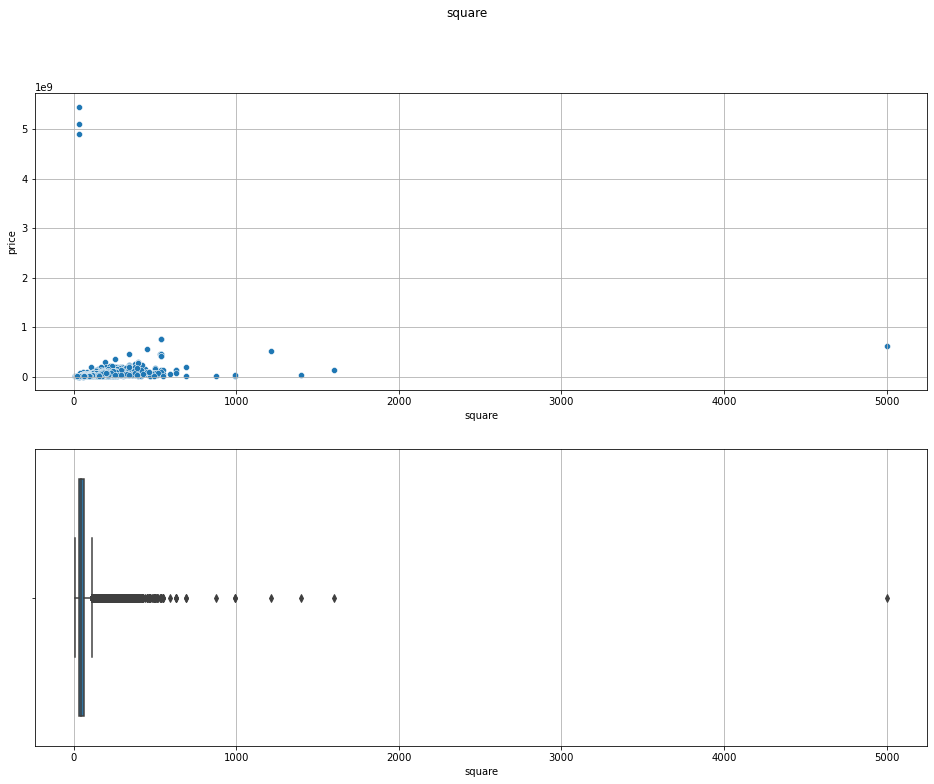

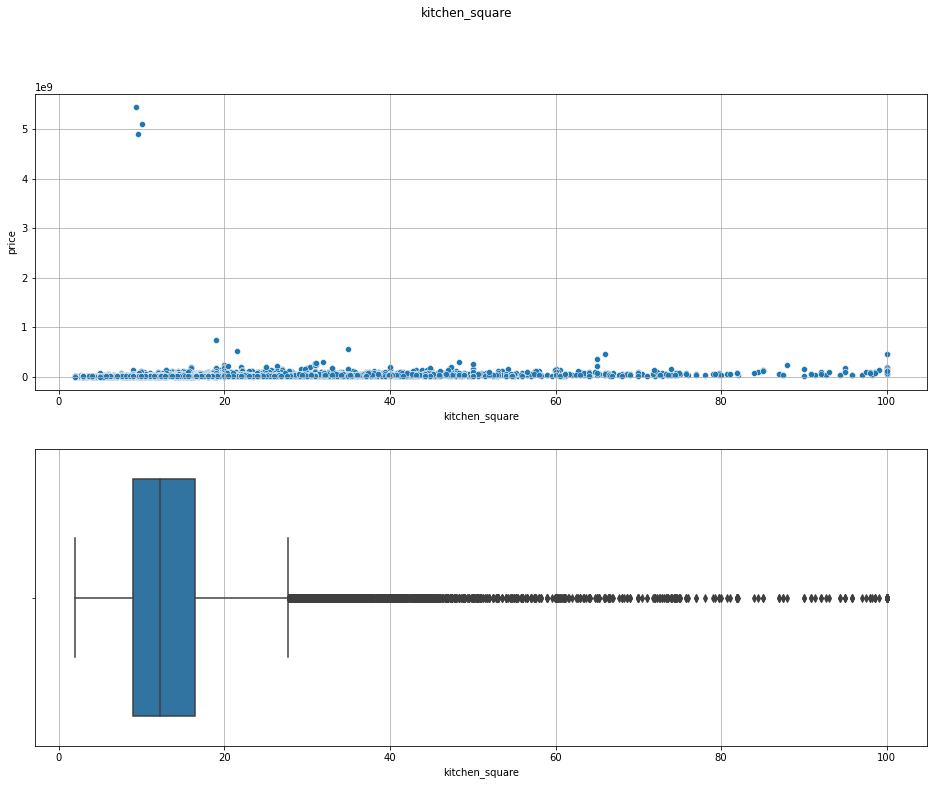

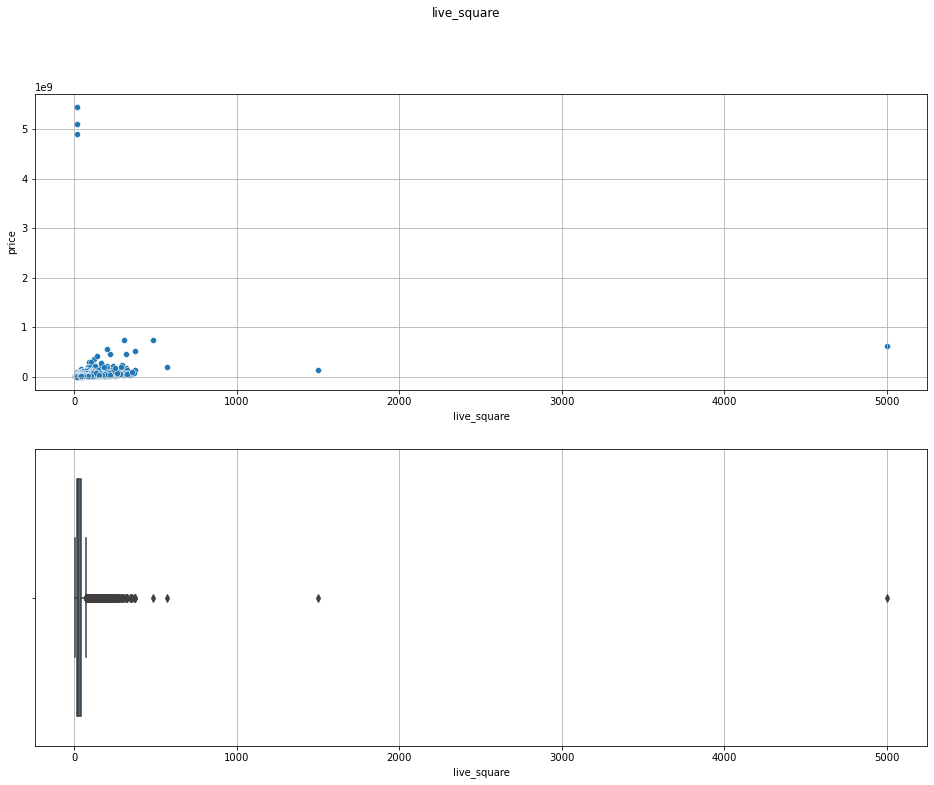

In [18]:
outliners_visualization(df, num_features)

Признак `square` по сути состоит из признаков `kitchen_square` и `live_square`. В идеале их поведение должно быть плюс\минус одинковым, но это необязательно так.

Есть явные выбросы. Точно нужно избавится от площадей больше 1000 м2. Так же есть несколько значений с маленькой площадью, но очень большой ценой. Надо взяглунуть на них отдельно.

Большая часть данных расположена примерно в интервале от 10 до 150 м2. Объявления с площадью больше 400 это совсем экзотика, очень элитное жилье или целые этажы (даже несколько) или дома. Найти закономерность для таких данных довольно сложно. Думаю лучше всего будет просто избавиться от таких данных. От 150 до 400 надо изучить подробнее и решить, что с ними делать.

In [19]:
df[df['square']>400].shape[0]

66

Всего **66** объявления. На фоне общего количества данных (> 100000) думаю можно спокойно избавиться от них.

In [20]:
df[(df['square']<50) & (df['price']>100000000)]

,page,description,flat_type,object_type,rooms,floors,square,kitchen_square,live_square,price,build_matireal,public_date,update_date,district_rating,district,underground,eco_rating,clear_rating,gkh_rating,neighbor_rating,kids_rating,sport_rest_rating,shop_rating,traffic_rating,secure_rating,life_price_rating,total_floors,metro_station,sample
61511,https://www.domofond.ru/1-komnatnaya-kvartira-...,"№290348 г. Санкт-Петербург, Проспект Ветеранов...",Квартира,Вторичная,1,8,36.0,10.1,15.3,5.110000e+09,Монолит,15/3/2021,24/3/2021,"3,7",Красносельский,1000 - 2000,"3,4","3,2","2,9","3,7","3,8","3,5","4,3","3,2","3,4","2,5",12,Сергиево (Володарская),1
66000,https://www.domofond.ru/1-komnatnaya-kvartira-...,"Прямая продажа!!!!!!, Уютная 1-комнатная квар...",Квартира,Вторичная,1,20,36.6,9.6,16.0,4.900000e+09,Монолит,10/3/2021,24/3/2021,"3,7",Выборгский,1000 - 2000,"3,4","3,2","2,9","3,7","3,8","3,5","4,3","3,2","3,4","2,5",28,Парнас,1
81857,https://www.domofond.ru/1-komnatnaya-kvartira-...,"№290619 Продается квартира ЖК «Лондон Парк», ...",Квартира,Вторичная,1,20,36.0,9.4,18.6,5.446984e+09,Кирпич,19/3/2021,24/3/2021,"3,6",Выборгский,1000 - 2000,"3,3","3,2","2,8","3,6","3,6","3,5","4,2","3,0","3,4","2,3",25,Проспект Просвещения,1


Слишком большая цена для таких параметров.

Таких объявлений или уже нет или это ошибка. Их всего 3, просто удалю их.

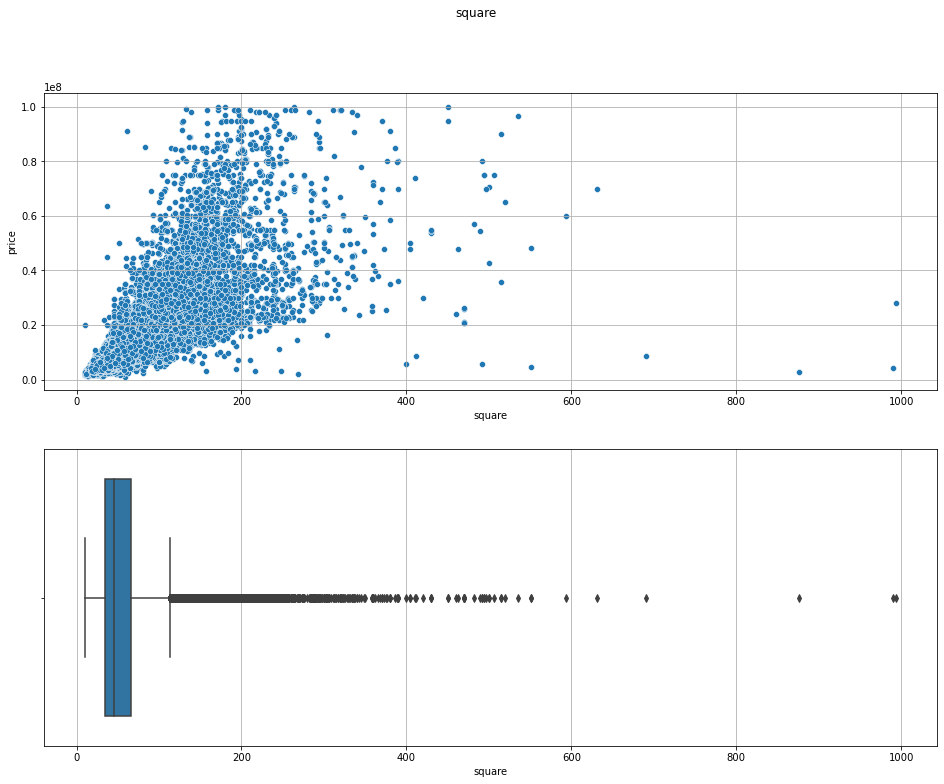

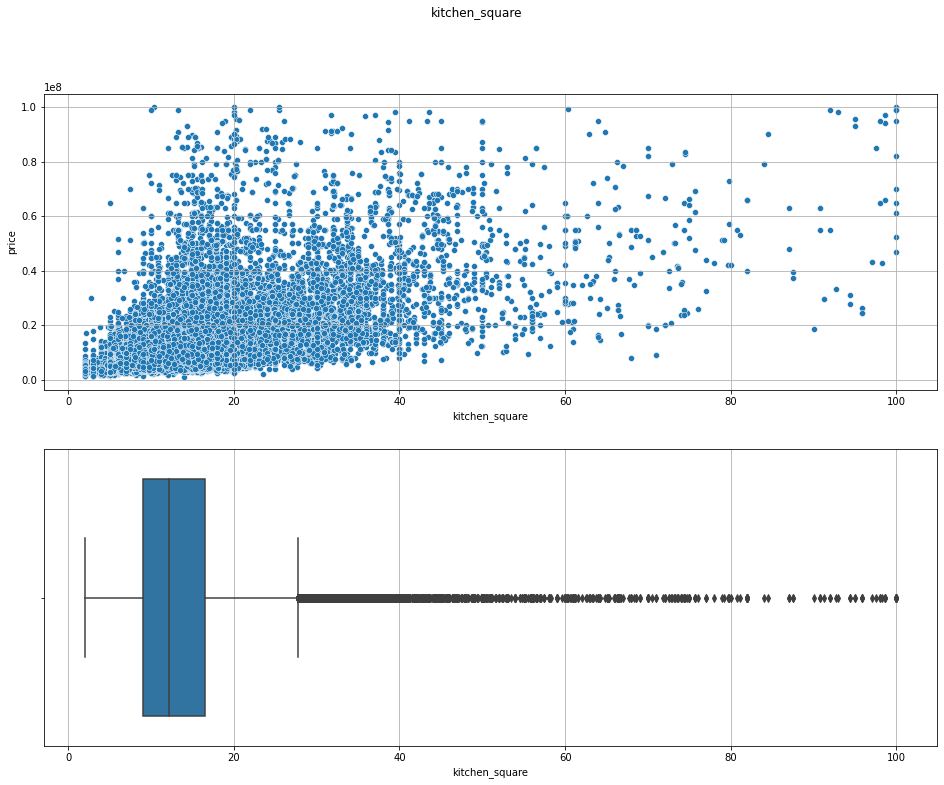

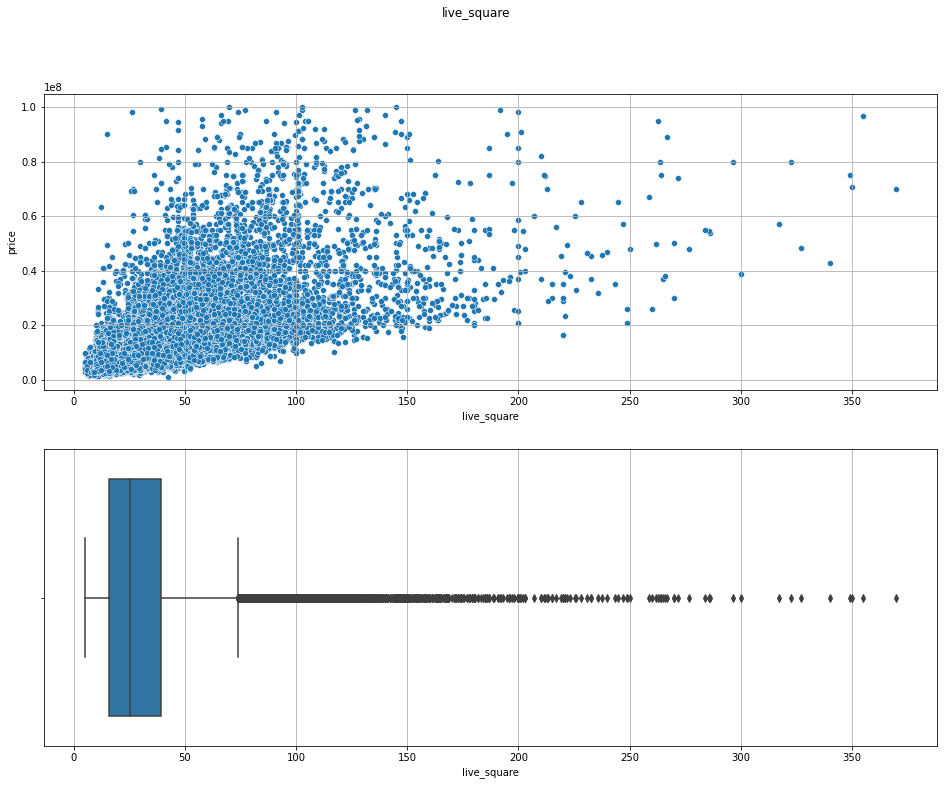

In [22]:
outliners_visualization(df[(df['square']<1000) & (df['price']<100000000)], num_features)

## < 400 m2

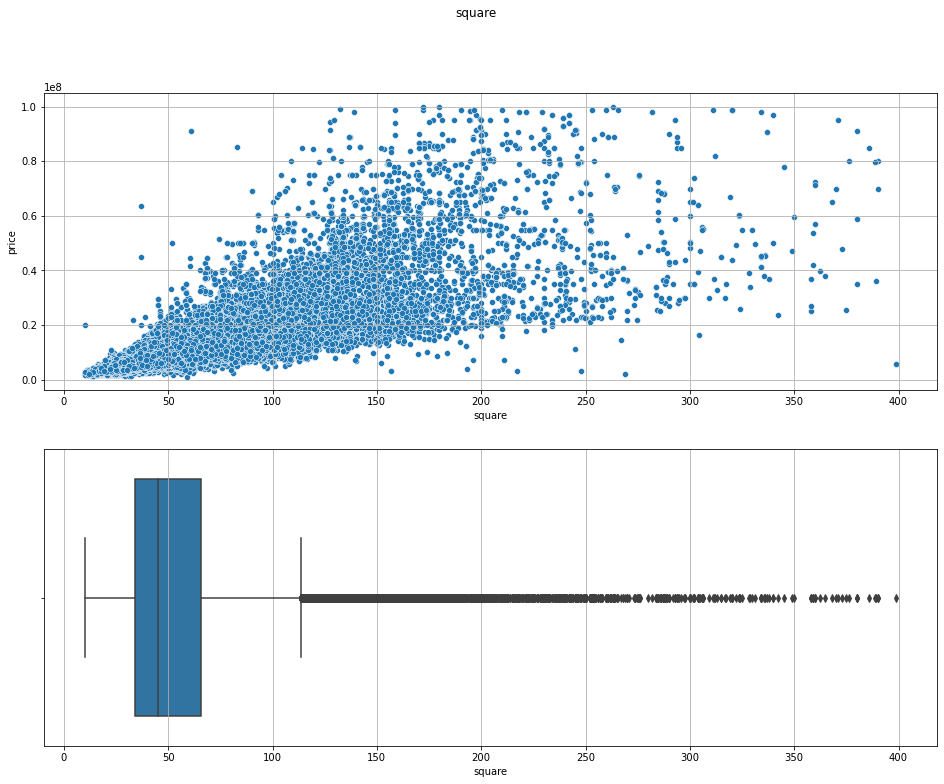

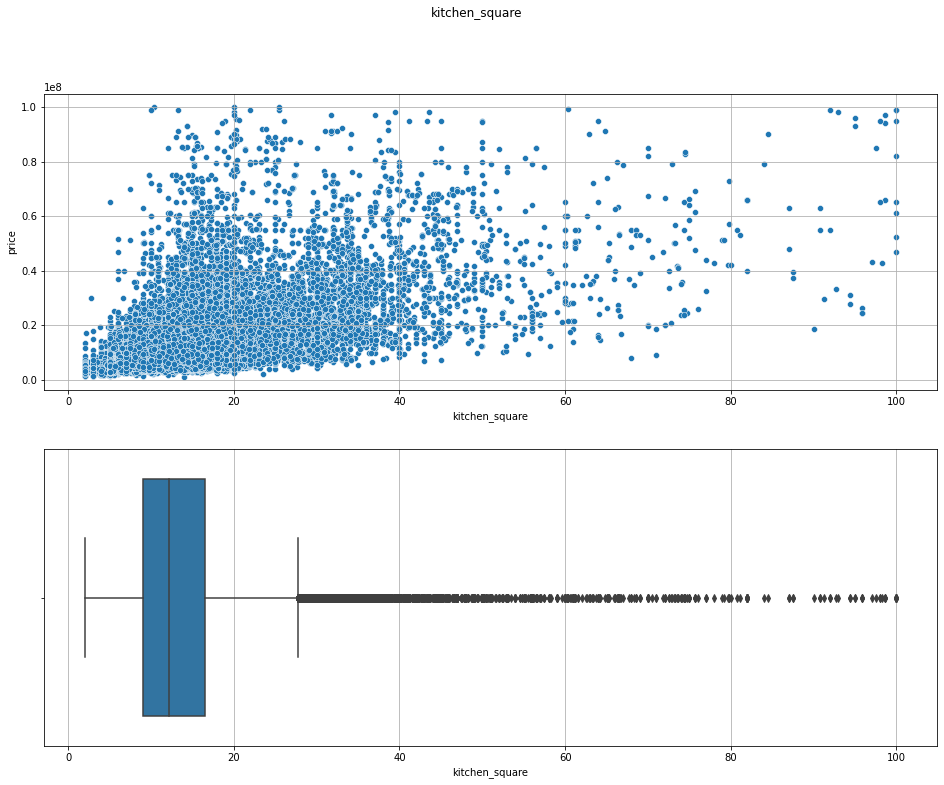

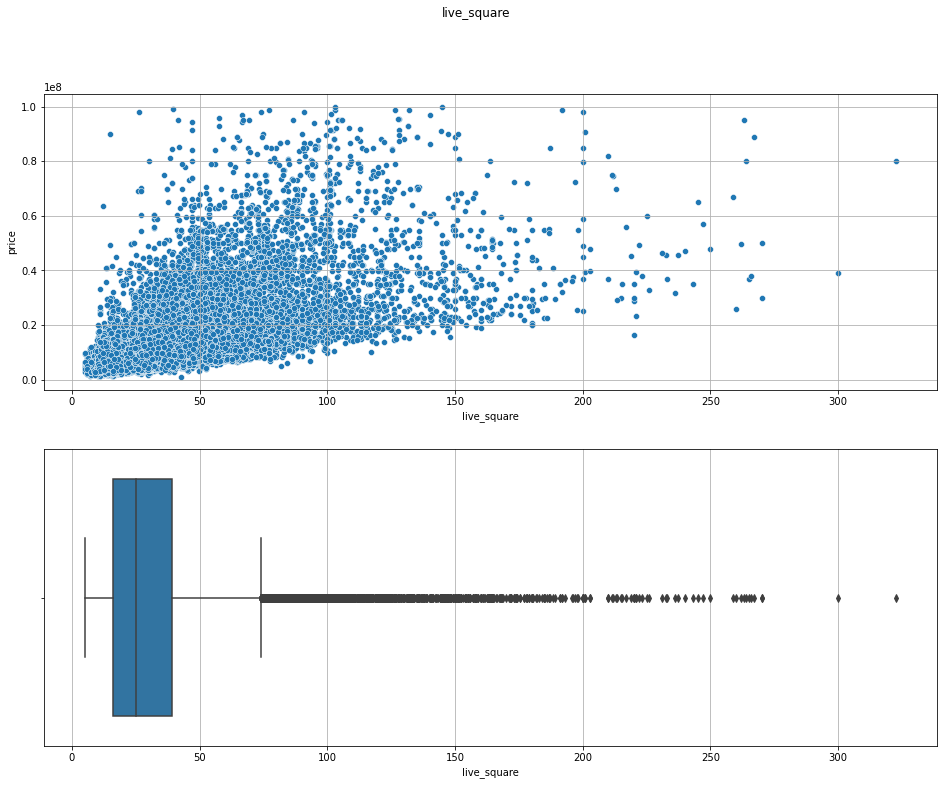

In [23]:
outliners_visualization(df[(df['square']<401) & (df['price']<100000000)], num_features)

Выглядит немного лучше, но есть что можно улучшить.

## < 130 m2

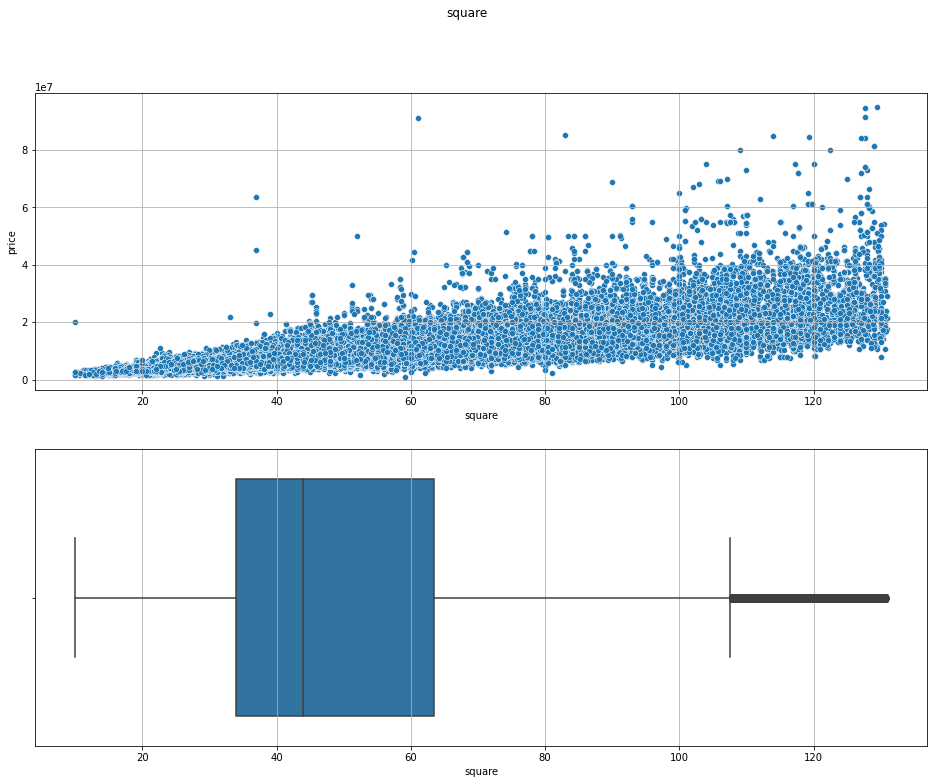

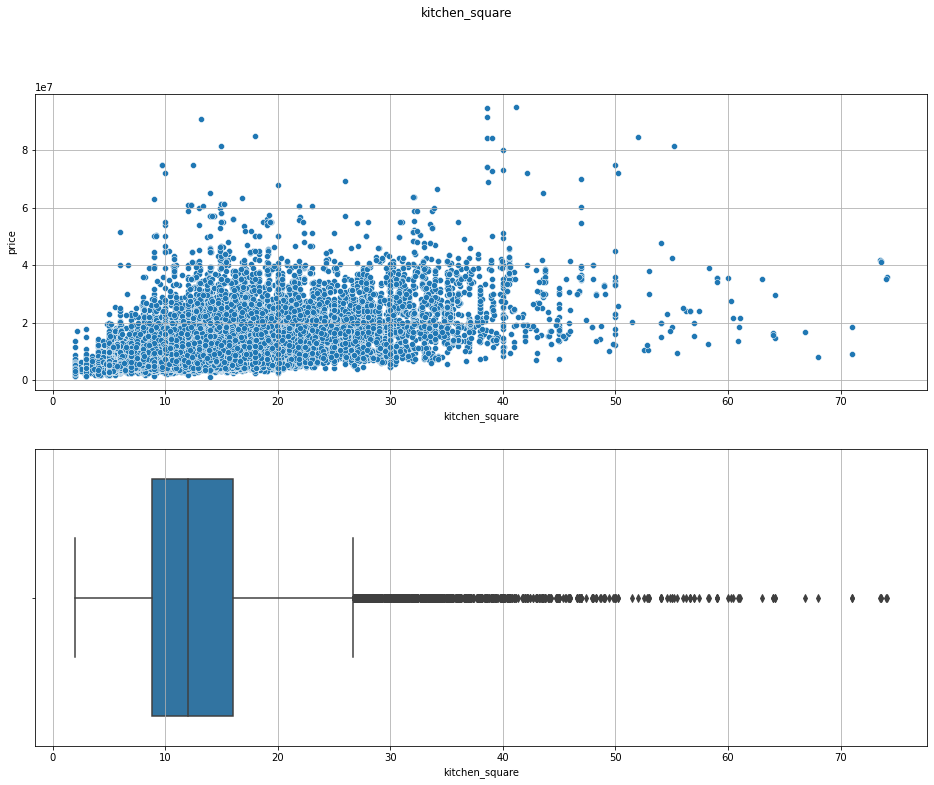

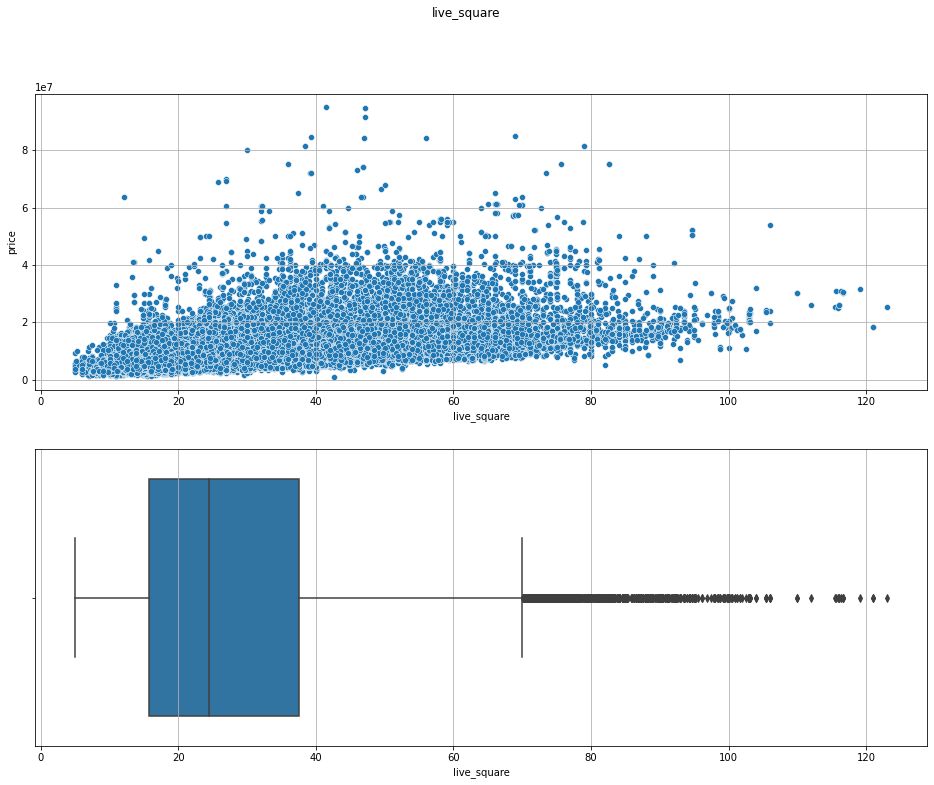

In [24]:
outliners_visualization(df[(df['square']<131) & (df['price']<100000000)], num_features)

In [25]:
df[df['square']>130].shape[0]

4685

Объявления до 130 м2 выглядят очень хорошо, если смотреть на общую площадь. Есть небольшое количество значений похожих на выбросы. При построении моделей нужно попробовать разные варианты обработки выбросов. Поробовать взять разные диапазоны допустимых значений.

# DISTRIBUTION

In [26]:
def num_visualization(df, num_features):
    
    """ Строит distplot (seaborn) для всех числовых признаков. """
    
    for num in num_features:
        
        fig = plt.figure(figsize=(12, 5))
        fig.suptitle(num)
        
        plt.grid(axis='both')
        plt.axvline(x = df[num].mean(), c = 'red') # среднее значение
        plt.axvline(x = df[num].median(), c = 'green') # медиана
        sns.distplot(df[num], fit=norm)
    
        dark_line = mlines.Line2D([], [], color='black', label='norm. dist.')
        grean_line = mlines.Line2D([], [], color='green', label='median')
        red_line = mlines.Line2D([], [], color='red', label='mean')
        plt.legend(handles=[dark_line, grean_line, red_line])
        
        plt.show()
        
        print(f'Kurtosis: {df[num].kurtosis()}')
        print(f'Skewness: {df[num].skew()}')

## all data

C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


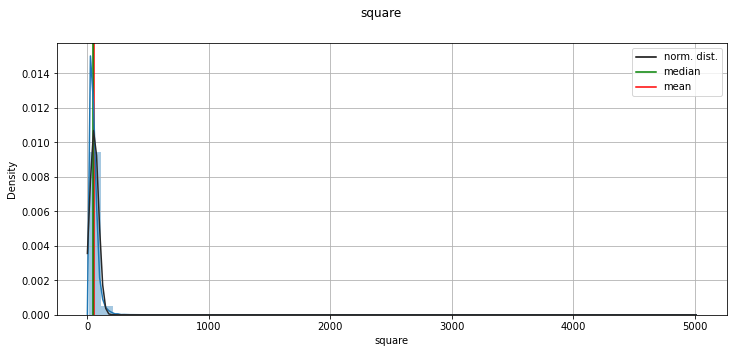

Kurtosis: 2328.88604898918
Skewness: 20.871951813976217


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


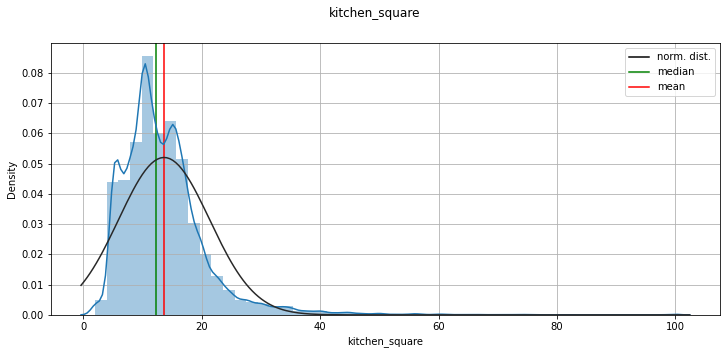

Kurtosis: 19.188843855999703
Skewness: 2.981645532053993


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


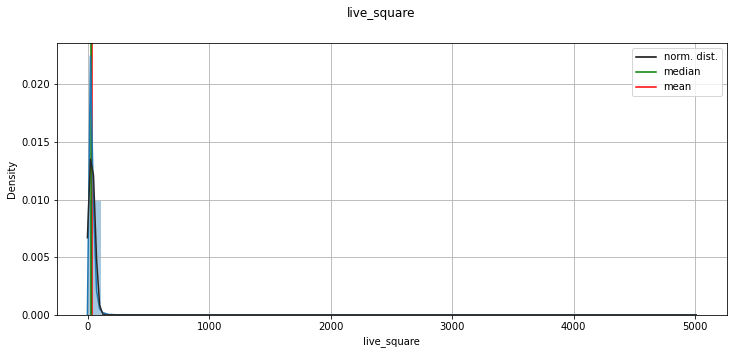

Kurtosis: 11394.640610753553
Skewness: 66.882935459696


In [27]:
num_visualization(df, num_features)

## < 400 m2

C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


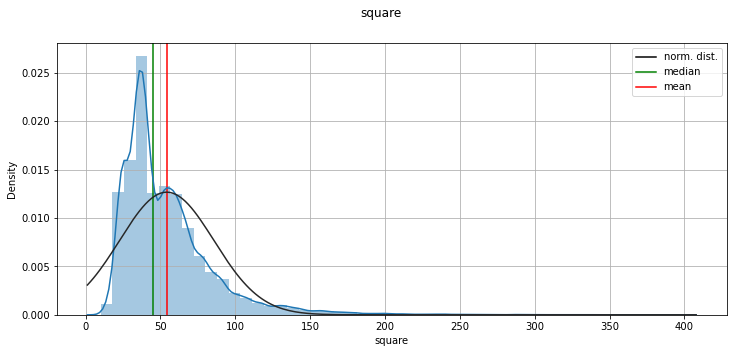

Kurtosis: 10.288893338088185
Skewness: 2.403707019207406


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


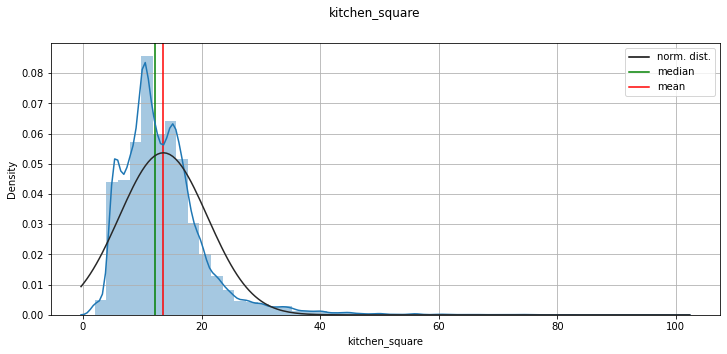

Kurtosis: 15.743444090977365
Skewness: 2.6794693515008663


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


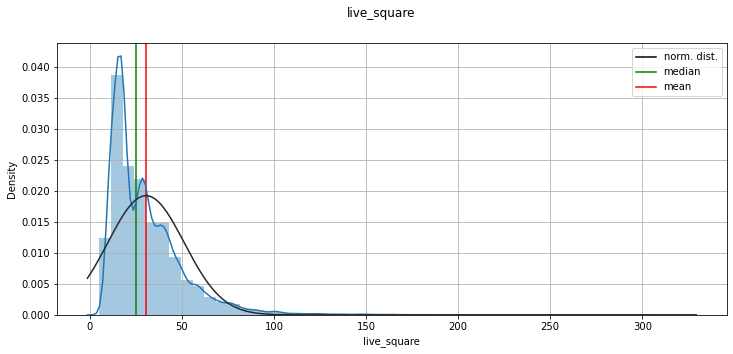

Kurtosis: 12.025145740893095
Skewness: 2.478787941090026


In [28]:
num_visualization(df[(df['square']<401) & (df['price']<100000000)], num_features)

## < 130 m2

C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


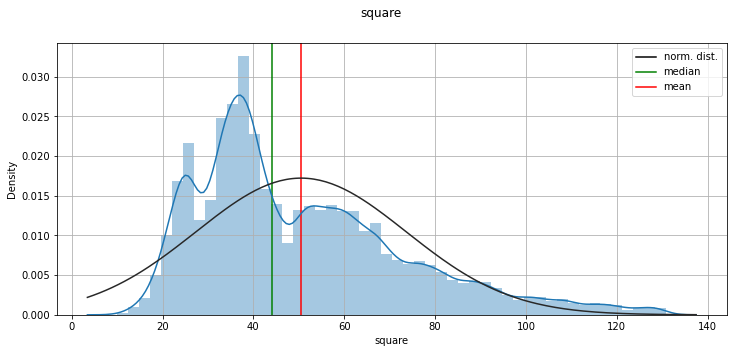

Kurtosis: 0.620511423822665
Skewness: 0.9911466398883545


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


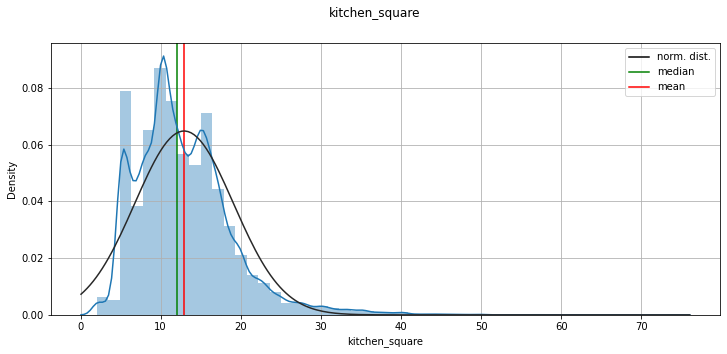

Kurtosis: 5.2956110143936215
Skewness: 1.5206139648045818


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


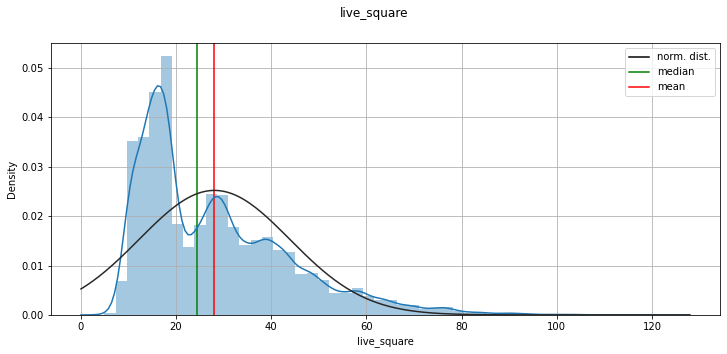

Kurtosis: 1.3523397503669137
Skewness: 1.1872896184590869


In [29]:
num_visualization(df[(df['square']<131) & (df['price']<100000000)], num_features)

Все распределения бимодальные, с хвостами смещенными вправо.

Попробуем взяглунать на студии и квартиры отдельно друг от друга.

## Студии

C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


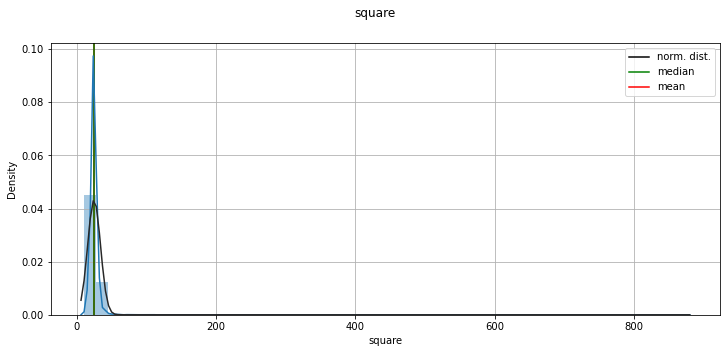

Kurtosis: 3506.4060215257296
Skewness: 44.52711558128612


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


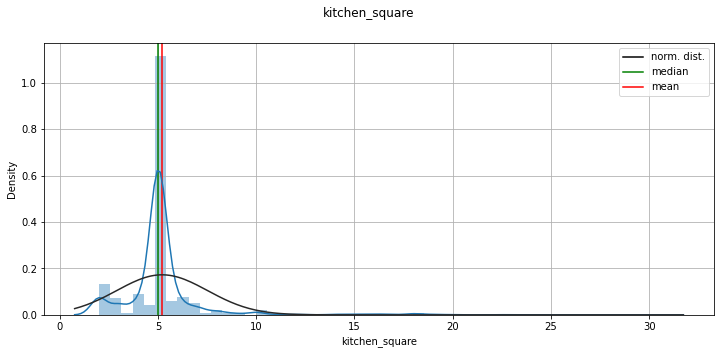

Kurtosis: 22.626131027240266
Skewness: 3.8791088744600253


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


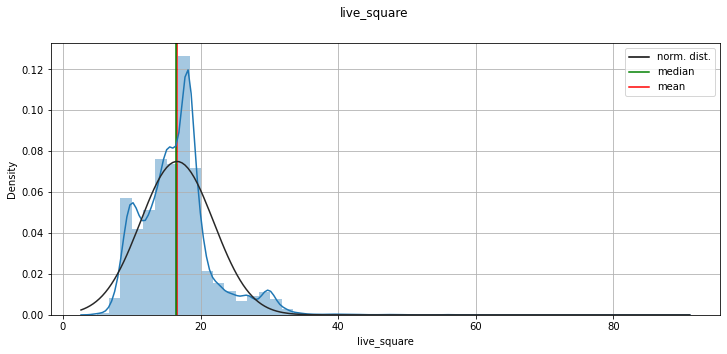

Kurtosis: 9.588240706029703
Skewness: 1.580238271473789


In [30]:
num_visualization(df[(df['square']<1000) & (df['price']<100000000) & (df['flat_type']=='Студия')], num_features)

### < 130 m2

C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


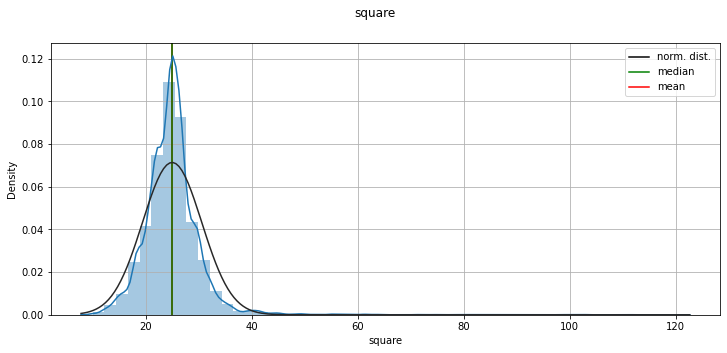

Kurtosis: 41.82106562059175
Skewness: 3.824488445435114


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


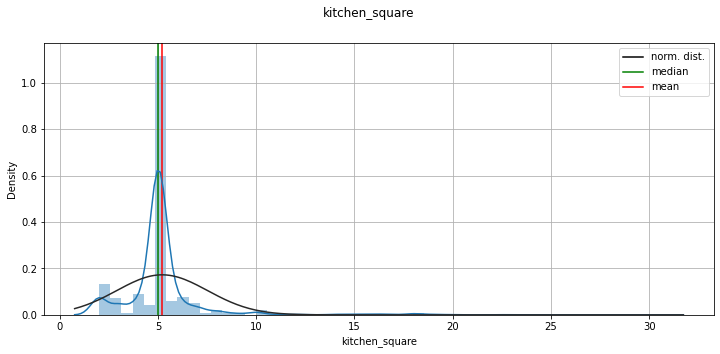

Kurtosis: 22.63581630417056
Skewness: 3.88076871956286


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


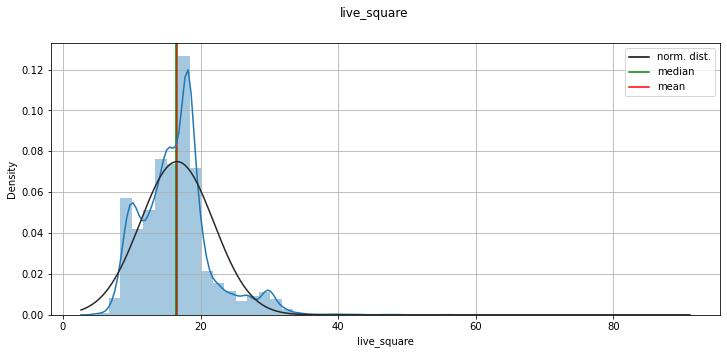

Kurtosis: 9.59362277280022
Skewness: 1.58070975628159


In [31]:
num_visualization(df[(df['square']<131) & (df['price']<100000000) & (df['flat_type']=='Студия')], num_features)

## Квартиры

C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


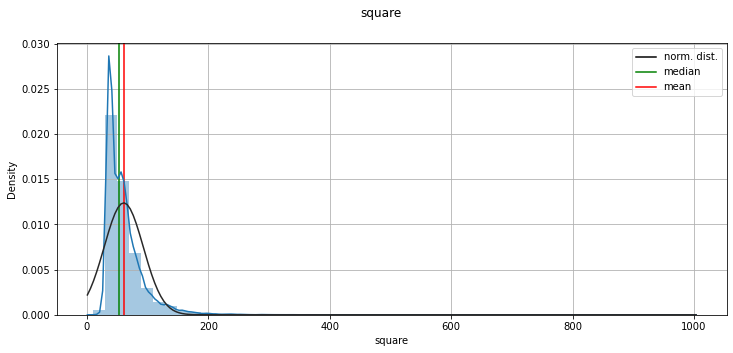

Kurtosis: 31.835089187558378
Skewness: 3.4455853550486295


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


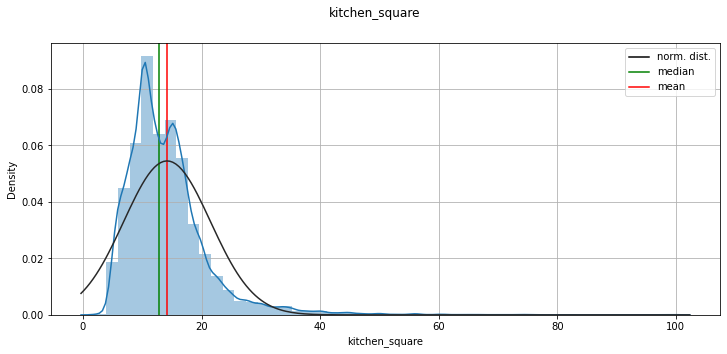

Kurtosis: 17.772979287320755
Skewness: 2.9329548623189288


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


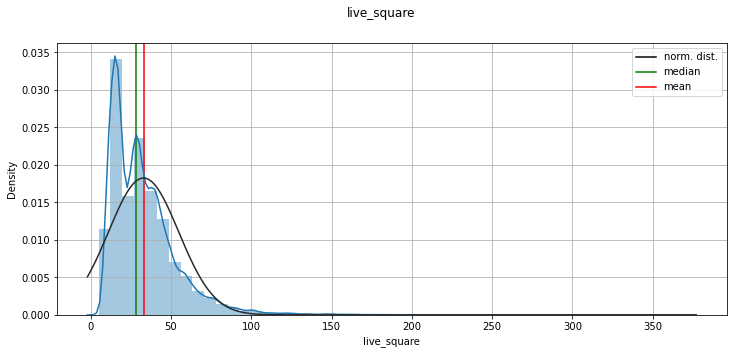

Kurtosis: 16.066484576518427
Skewness: 2.6710312815538724


In [32]:
num_visualization(df[(df['square']<1000) & (df['price']<100000000) & (df['flat_type']=='Квартира')], num_features)

### < 130 m2

C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


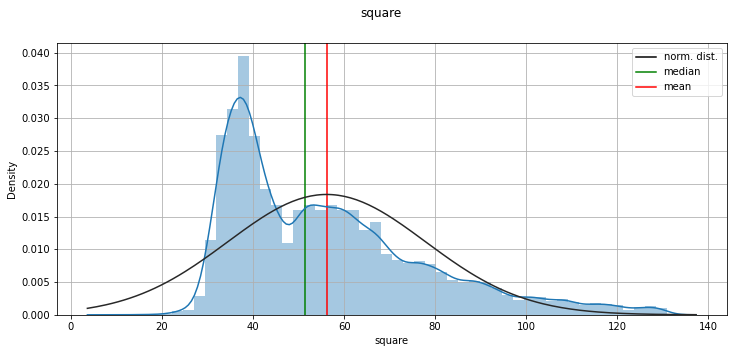

Kurtosis: 0.675716702469487
Skewness: 1.0656779380507968


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


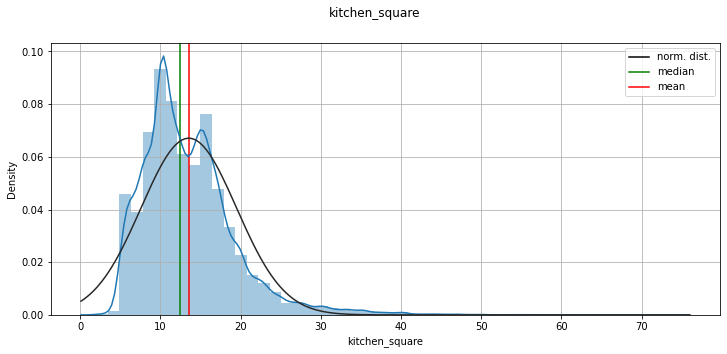

Kurtosis: 6.209379506246133
Skewness: 1.7090180557133736


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


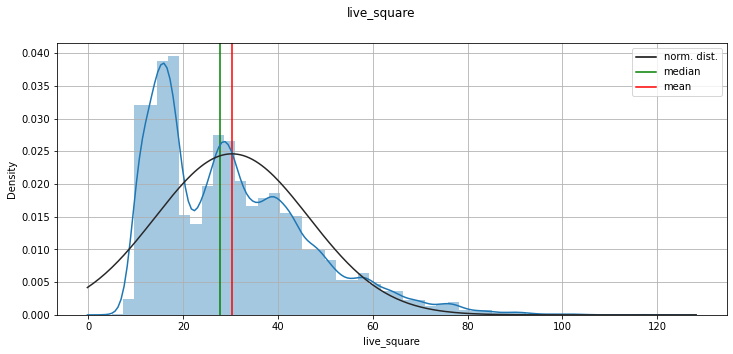

Kurtosis: 0.9496777421215374
Skewness: 1.0100878516200935


In [33]:
num_visualization(df[(df['square']<131) & (df['price']<100000000) & (df['flat_type']=='Квартира')], num_features)

## Fill NaN

Попробуем сделать следующее: добавлю два новых числовых признака `kitchen_part` и `live_part`. Эти признаки показывают какую долю занимает кухня и жилая площадь от всей площади. Посмотрю среднее значение этих признаков и на основе этого попробую заполнить пропуски и посмотрю, что получится.

In [34]:
def add_new_features(df):
    
    """ Добавляет новые признаки. """

    temp_df = df.copy()

#   Доля кухни от всей площади. Понадобится для заполнения пропусков.
    temp_df['kitchen_part'] = 0
    temp_df['kitchen_part'] = (np.round(temp_df['kitchen_square'] / temp_df['square'], 2))
    
#   Доля жилой площади от всей площади. Понадобится для заполнения пропусков.
    temp_df['live_part'] = 0
    temp_df['live_part'] = (np.round(temp_df['live_square'] / temp_df['square'], 2))

    return temp_df

In [35]:
df_fillna = add_new_features(df)

In [36]:
df_fillna['kitchen_part'].describe().T

count    79800.000000
mean         0.247284
std          0.105011
min          0.000000
25%          0.170000
50%          0.230000
75%          0.300000
max          1.000000
Name: kitchen_part, dtype: float64

In [37]:
df_fillna['live_part'].describe().T

count    87736.000000
mean         0.545706
std          0.176373
min          0.020000
25%          0.430000
50%          0.520000
75%          0.640000
max          1.000000
Name: live_part, dtype: float64

In [38]:
df_fillna['kitchen_square'][df_fillna['kitchen_square'].isna()] = df_fillna['square'][df_fillna['kitchen_square'].isna()].apply(lambda x: x*0.24)

C:\Users\mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
df_fillna['live_square'][df_fillna['live_square'].isna()] = df_fillna['square'][df_fillna['live_square'].isna()].apply(lambda x: x*0.55)

C:\Users\mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Студии

C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


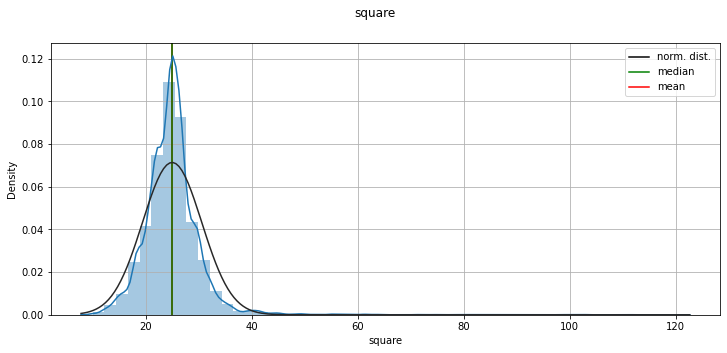

Kurtosis: 41.82106562059175
Skewness: 3.824488445435114


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


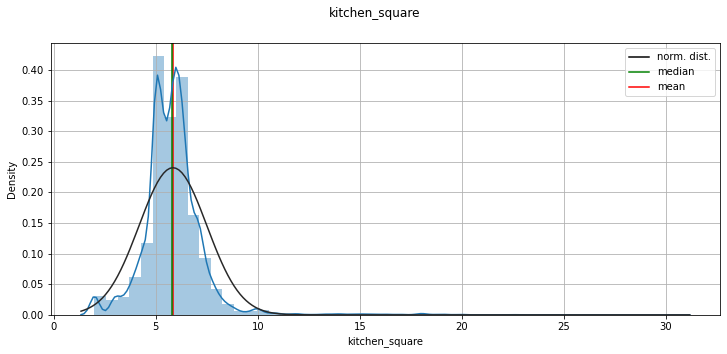

Kurtosis: 29.59676422173526
Skewness: 3.4948059218015706


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


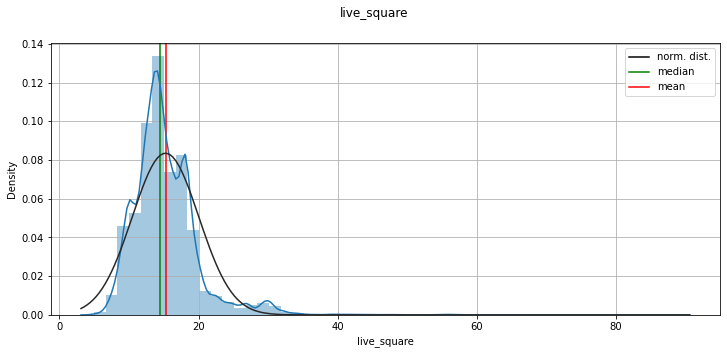

Kurtosis: 14.08900978815608
Skewness: 2.267408127262466


In [40]:
num_visualization(df_fillna[(df_fillna['flat_type']=='Студия') & (df_fillna['square']<131)], num_features)

### Квартиры

C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


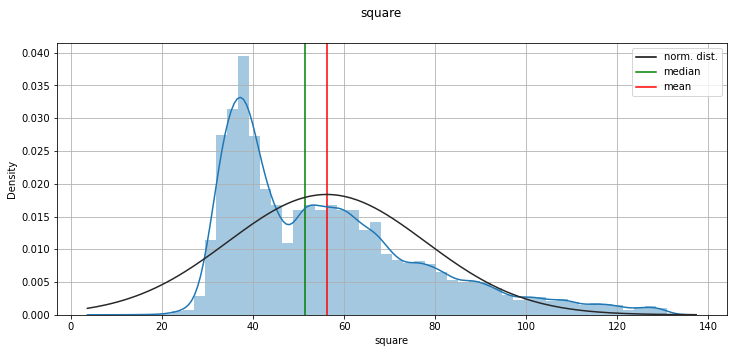

Kurtosis: 0.675644522365555
Skewness: 1.0656958614489755


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


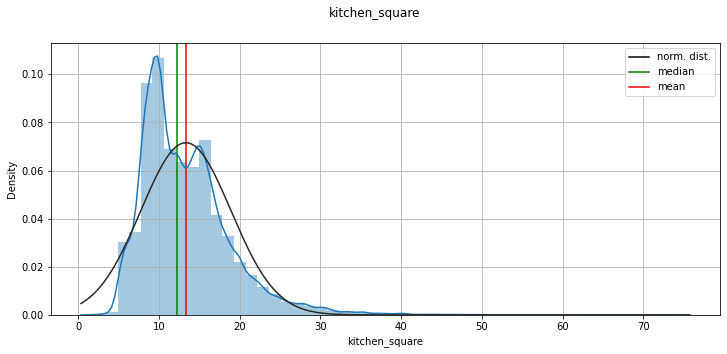

Kurtosis: 5.53176961910804
Skewness: 1.6121939530803693


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


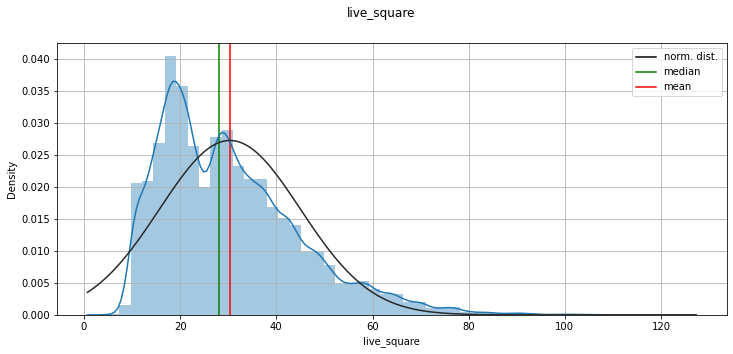

Kurtosis: 1.277687550912609
Skewness: 1.0559908611392712


In [41]:
num_visualization(df_fillna[(df_fillna['flat_type']=='Квартира') & (df_fillna['square']<131)], num_features)

При построении регресионной модели нужно будет стандартизировать данные.

# CORRELATION

## all data

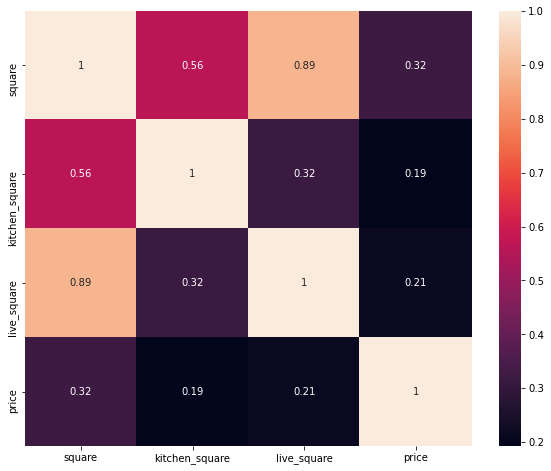

In [42]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(df[['square', 'kitchen_square', 'live_square', 'price']].corr(), annot=True)
plt.show()

## < 400 m2

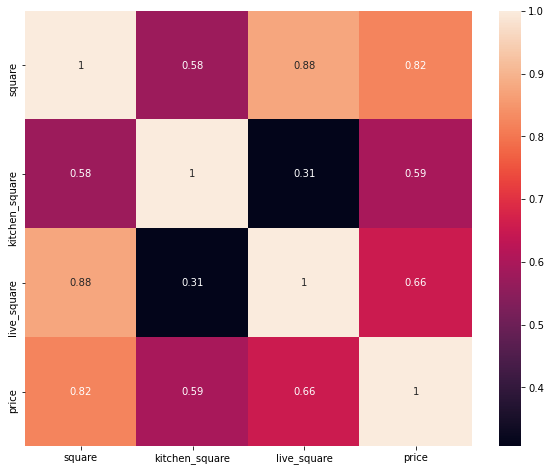

In [43]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(df[['square', 'kitchen_square', 'live_square', 'price']][(df['square']<401) & (df['price']<100000000)].corr(), annot=True)
plt.show()

## < 130 m2

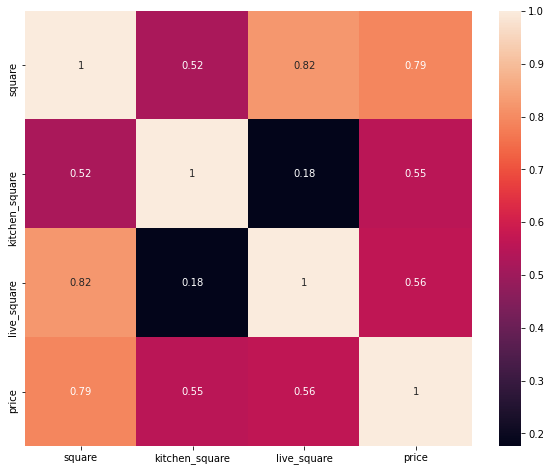

In [44]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(df[['square', 'kitchen_square', 'live_square', 'price']][(df['square']<131) & (df['price']<100000000)].corr(), annot=True)
plt.show()

**Отсекаем явные выбросы и корреляция между признаками и таргетом значительно увеличивается.**

**Промежуточный вывод**:

Если рассматривать максимально доступные объявления (не премиум класса), то в целом данные достаточно хорошие. При моделировании нужно попробвать разные варианты заполнения пропусков и обработки выбросов. Признаки `kitchen_square` и `live_square` для студий и квартир стоит обработать отдельно друг от друга.

Отдельно все же стоит попробовать построить модели с учетом жилья премимум класса, возможно получиться понять где модель ошибается и как это можно исправить.

# PROBABILITY

## all data

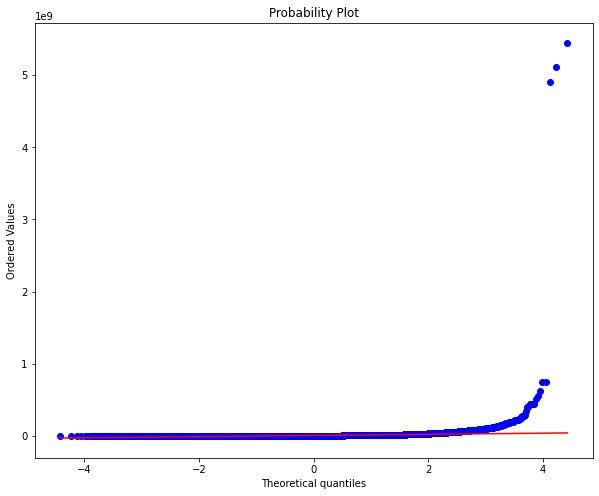

In [45]:
fig = plt.figure(figsize=(10,8))
res = stats.probplot(df['price'], plot=plt)

## < 400 m2

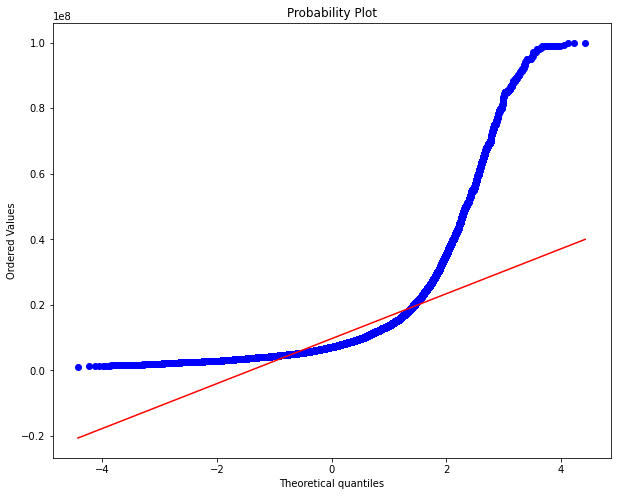

In [46]:
fig = plt.figure(figsize=(10,8))
res = stats.probplot(df['price'][(df['square']<401) & (df['price']<100000000)], plot=plt)

## < 400 m2 (log1p)

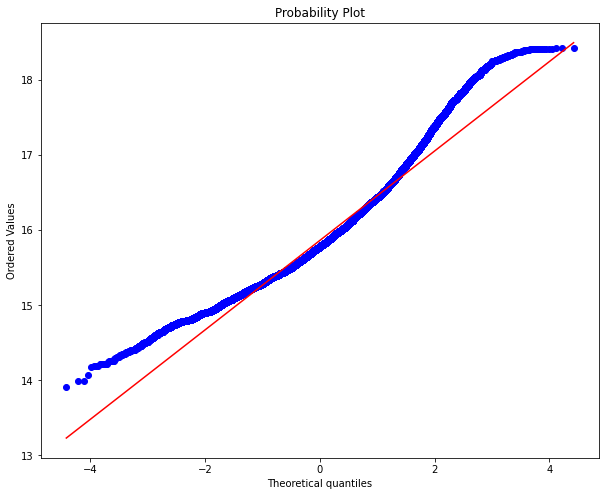

In [47]:
fig = plt.figure(figsize=(10,8))
res = stats.probplot(np.log1p(df['price'][(df['square']<401) & (df['price']<100000000)]), plot=plt)

## <130 m2

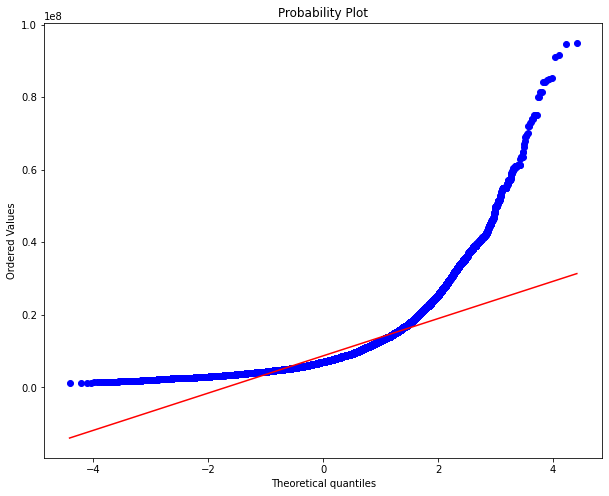

In [48]:
fig = plt.figure(figsize=(10,8))
res = stats.probplot(df['price'][(df['square']<131) & (df['price']<100000000)], plot=plt)

## < 130 m2 (log1p)

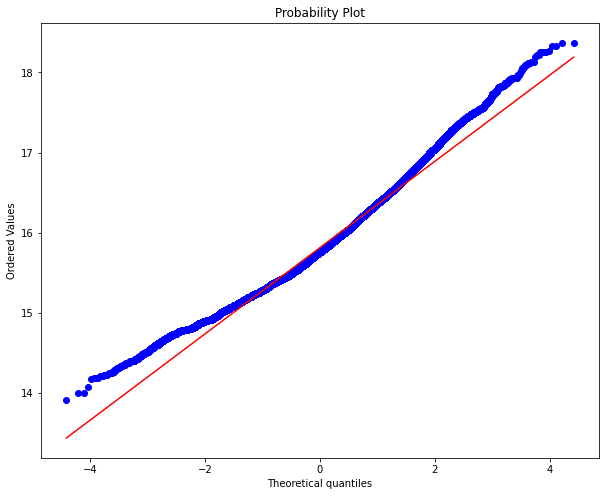

In [49]:
fig = plt.figure(figsize=(10,8))
res = stats.probplot(np.log1p(df['price'][(df['square']<131) & (df['price']<100000000)]), plot=plt)

Лучше всего выглядят объявления до 130 м2. Перед построением регресионной модели нужно будет стандартизировать данные.

# CATEGORICAL VISUALIZATION

In [50]:
cat_features = ['flat_type', 'object_type', 'rooms', 'floors',
                'build_matireal', 'district_rating', 'district', 'eco_rating', 'clear_rating',
                'gkh_rating', 'neighbor_rating', 'kids_rating', 'sport_rest_rating',
                'shop_rating', 'traffic_rating', 'secure_rating', 'life_price_rating',
                'total_floors', 'metro_station', 'underground'] 

## countplot

In [51]:
def cat_visualization(df, cat_features):
    
    """ 
    
    Строит countplot (seaborn) для всех категриальных признаков, 
    для train и test выборки.
    
    """

    # Количество признаков
    num_of_features = len(cat_features)

    for cat in cat_features:
        
        print(cat.upper()+'\n')
        
        for i in range(df[cat].nunique()):
            print('{}: {} / {}%'.format(df[cat].unique()[i],
                                        df[cat][df[cat] == df[cat].unique()[i]].count(),
                                        round((df[cat][df[cat] == df[cat].unique()[i]].count()*100)/df.shape[0], 2)))

        fig = plt.figure(figsize=(16, 8))
        
        if df[cat].nunique() > 10:
            plt.tick_params(axis='x', rotation=90)
            
        plt.grid(axis='both')
        sns.countplot(df[cat], order=df[cat].value_counts().index)
        
        plt.show()

FLAT_TYPE

Квартира: 115690 / 82.25%
Студия: 24727 / 17.58%
Своб. планировка: 234 / 0.17%


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


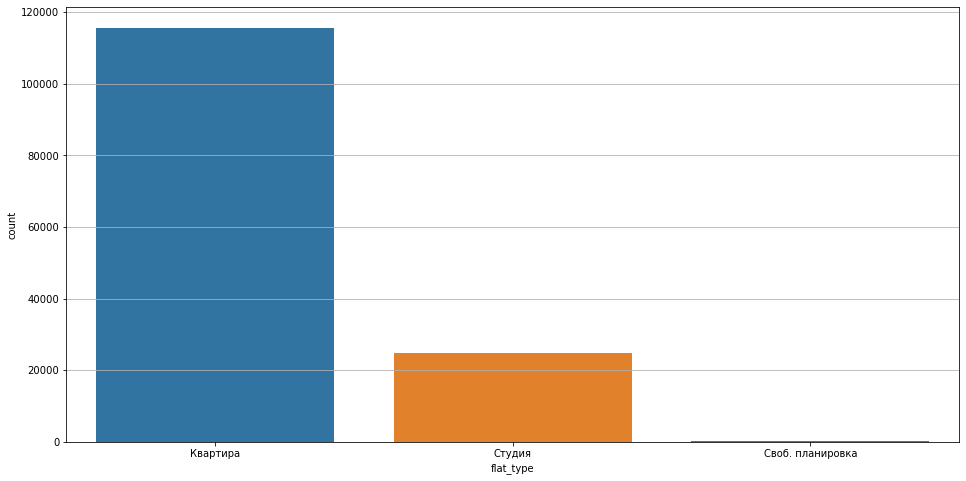

OBJECT_TYPE

Новостройка: 95323 / 67.77%
Вторичная: 45328 / 32.23%


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


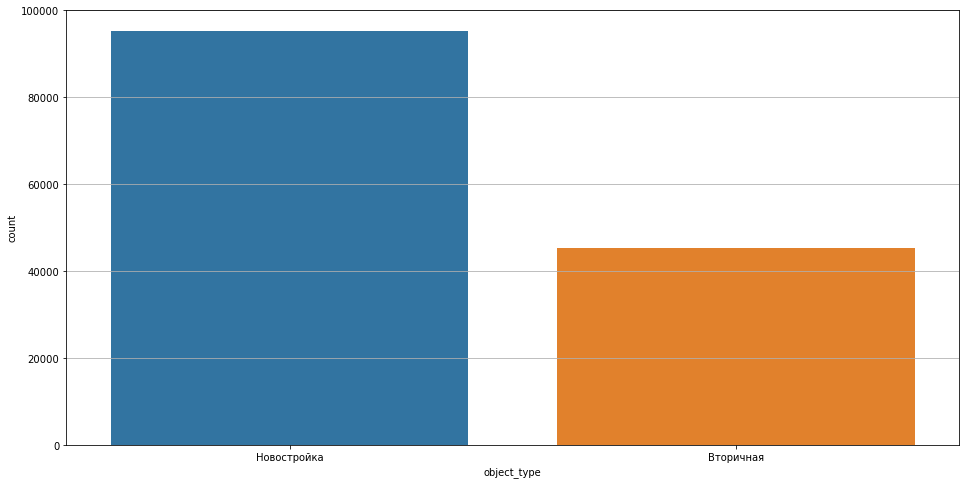

ROOMS

2: 39071 / 27.78%
1: 72597 / 51.61%
3: 23087 / 16.41%
7: 131 / 0.09%
5: 1155 / 0.82%
4: 4234 / 3.01%
9: 80 / 0.06%
Своб. планировка: 234 / 0.17%
8: 62 / 0.04%


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


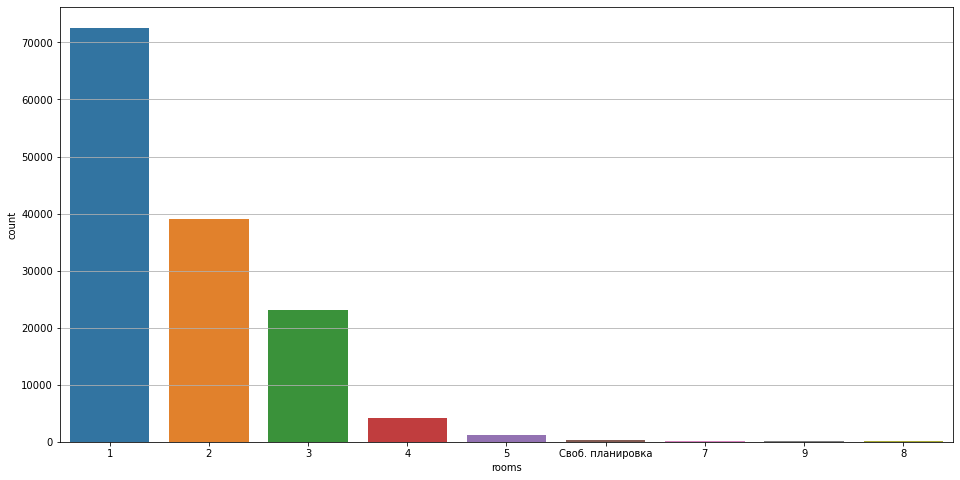

FLOORS

2: 16209 / 11.52%
7: 8912 / 6.34%
17: 2454 / 1.74%
20: 1725 / 1.23%
3: 13141 / 9.34%
11: 5888 / 4.19%
24: 995 / 0.71%
5: 11637 / 8.27%
25: 437 / 0.31%
15: 3244 / 2.31%
1: 8911 / 6.34%
8: 8473 / 6.02%
19: 1755 / 1.25%
14: 3522 / 2.5%
9: 7103 / 5.05%
12: 5529 / 3.93%
4: 12206 / 8.68%
10: 6462 / 4.59%
18: 2084 / 1.48%
6: 9106 / 6.47%
21: 1276 / 0.91%
13: 4300 / 3.06%
22: 1255 / 0.89%
16: 2767 / 1.97%
23: 1075 / 0.76%
26: 88 / 0.06%
27: 56 / 0.04%
32: 4 / 0.0%
34: 3 / 0.0%
30: 2 / 0.0%
28: 21 / 0.01%
29: 4 / 0.0%
33: 5 / 0.0%
35: 1 / 0.0%
31: 1 / 0.0%


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


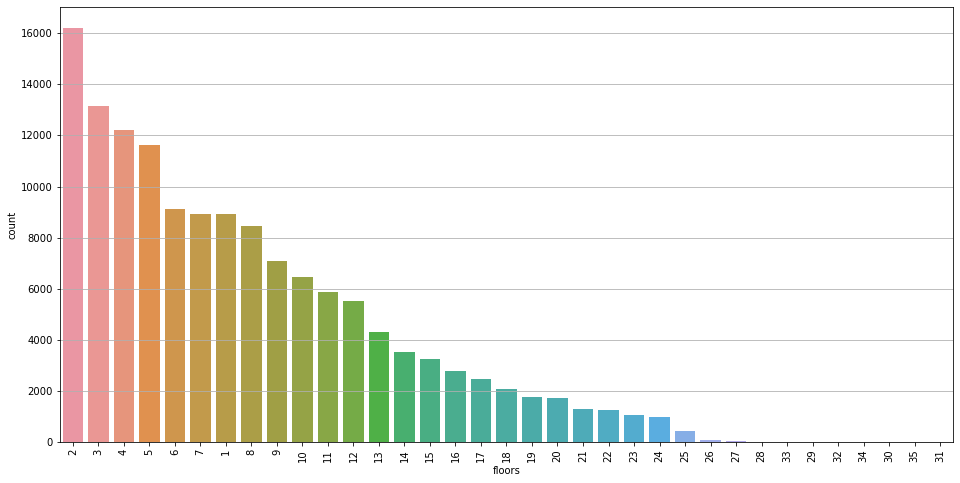

BUILD_MATIREAL

Кирпич: 51831 / 36.85%
Монолит: 71548 / 50.87%
Панель: 16547 / 11.76%
Блоки: 697 / 0.5%
Дерево: 28 / 0.02%


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


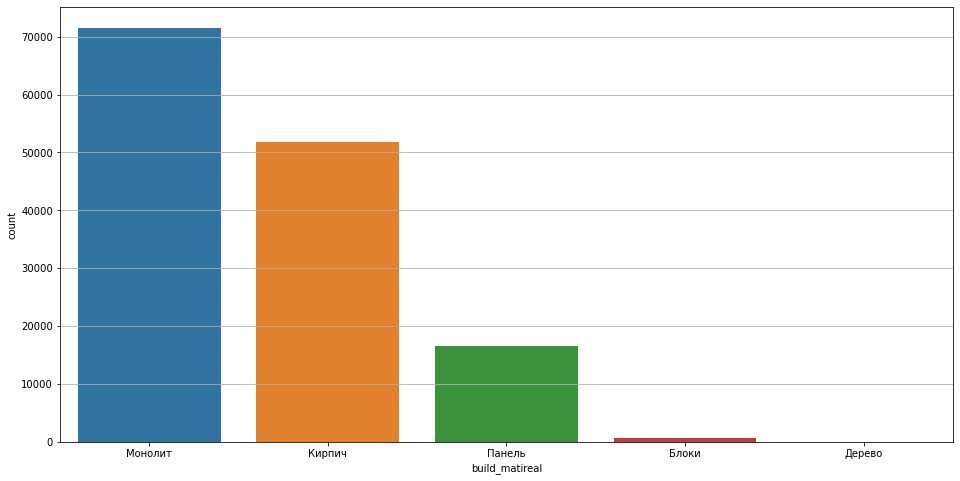

DISTRICT_RATING

3,8: 20614 / 14.66%
3,6: 7721 / 5.49%
3,2: 7601 / 5.4%
3,9: 16024 / 11.39%
3,7: 58220 / 41.39%
3,4: 3015 / 2.14%
4,0: 13394 / 9.52%
3,5: 7217 / 5.13%
3,3: 3062 / 2.18%
4,1: 3783 / 2.69%


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


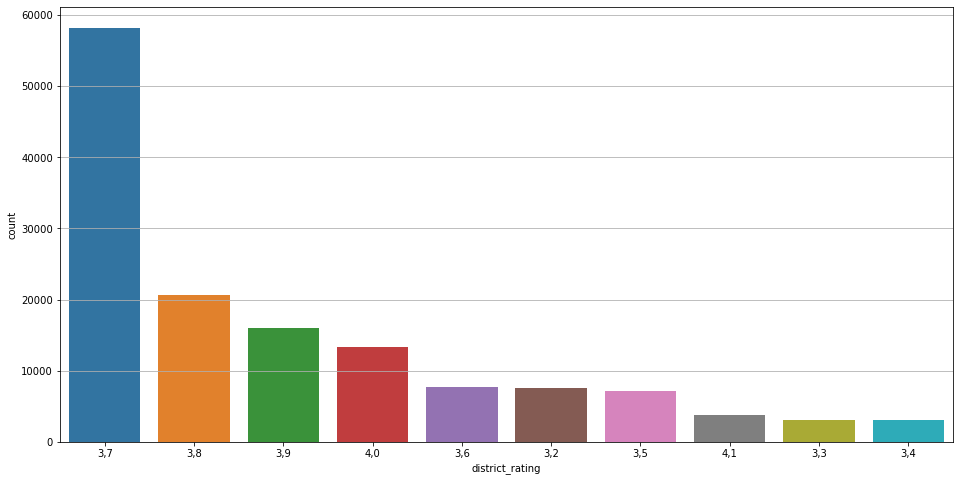

DISTRICT

Приморский: 22389 / 15.92%
Калининский: 13747 / 9.77%
Невский: 17902 / 12.73%
Красногвардейский: 4871 / 3.46%
Колпинский: 1626 / 1.16%
Пушкинский: 2543 / 1.81%
Выборгский: 22045 / 15.67%
Петроградский: 5849 / 4.16%
Московский: 14600 / 10.38%
Кировский: 3706 / 2.63%
Красносельский: 9292 / 6.61%
Центральный: 4001 / 2.84%
Ваcилеостровский: 7393 / 5.26%
Фрунзенский: 2606 / 1.85%
Всеволожский: 296 / 0.21%
Адмиралтейский: 5395 / 3.84%
Санкт-Петербург: 2042 / 1.45%
Петродворцовый: 348 / 0.25%


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


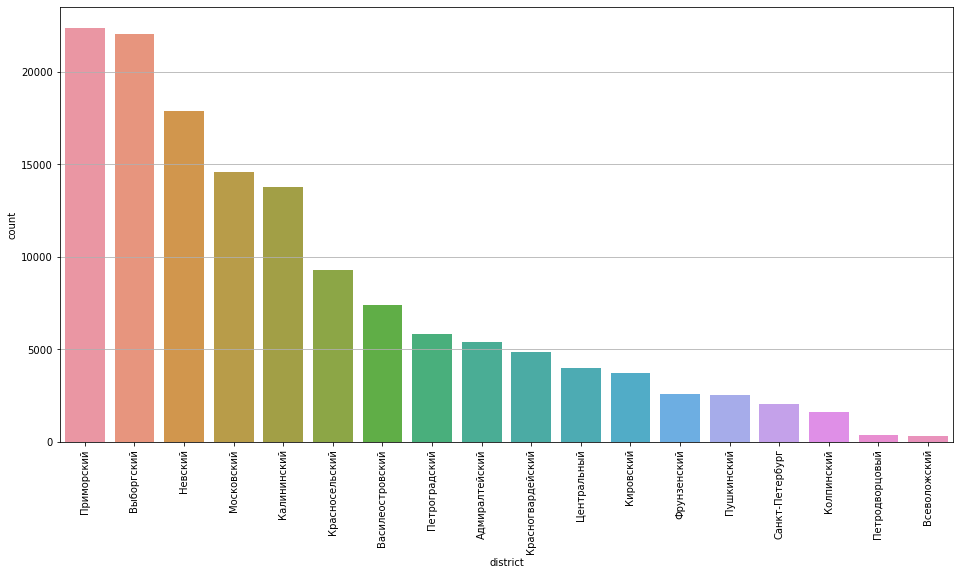

ECO_RATING

3,1: 14753 / 10.49%
3,6: 5771 / 4.1%
2,8: 7733 / 5.5%
3,3: 9557 / 6.79%
3,7: 13759 / 9.78%
2,4: 3082 / 2.19%
4,0: 2347 / 1.67%
3,2: 11966 / 8.51%
3,4: 51768 / 36.81%
3,5: 6093 / 4.33%
2,9: 4007 / 2.85%
4,4: 1452 / 1.03%
3,9: 1119 / 0.8%
3,8: 4331 / 3.08%
2,6: 914 / 0.65%
2,3: 1644 / 1.17%
4,2: 355 / 0.25%


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


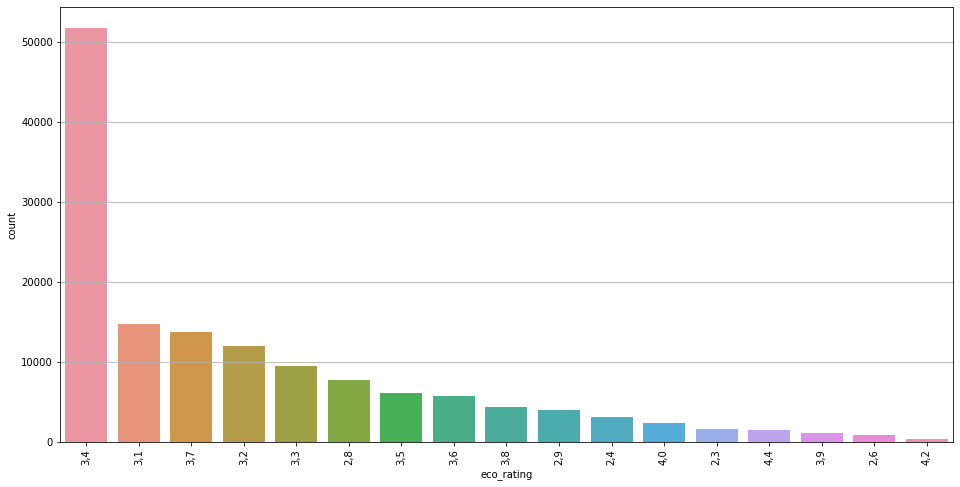

CLEAR_RATING

3,5: 21906 / 15.57%
3,3: 9285 / 6.6%
2,6: 4671 / 3.32%
3,1: 8218 / 5.84%
3,4: 17096 / 12.15%
3,2: 53293 / 37.89%
2,3: 1219 / 0.87%
2,8: 8619 / 6.13%
3,0: 4621 / 3.29%
3,8: 1140 / 0.81%
3,6: 6941 / 4.93%
2,9: 3490 / 2.48%
2,7: 152 / 0.11%


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


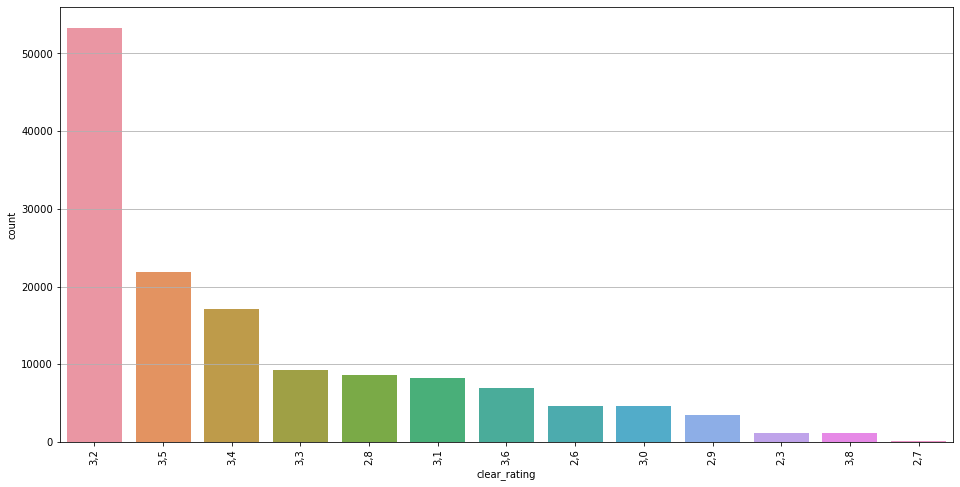

GKH_RATING

3,3: 31230 / 22.2%
2,8: 5797 / 4.12%
2,3: 4823 / 3.43%
3,1: 5910 / 4.2%
3,0: 8802 / 6.26%
2,6: 2930 / 2.08%
3,2: 12596 / 8.96%
2,9: 55681 / 39.59%
2,0: 1219 / 0.87%
2,1: 3921 / 2.79%
2,7: 5356 / 3.81%
2,2: 1329 / 0.94%
2,5: 383 / 0.27%
2,4: 315 / 0.22%
3,5: 359 / 0.26%


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


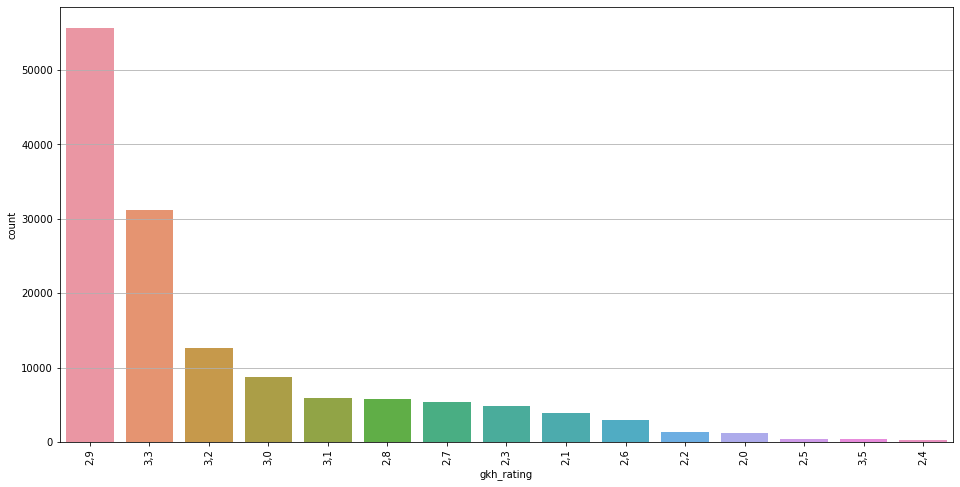

NEIGHBOR_RATING

3,8: 21968 / 15.62%
3,5: 8689 / 6.18%
3,2: 4671 / 3.32%
4,3: 2535 / 1.8%
3,4: 9334 / 6.64%
3,9: 17383 / 12.36%
3,7: 56006 / 39.82%
4,0: 8223 / 5.85%
3,6: 10016 / 7.12%
3,3: 914 / 0.65%
4,1: 912 / 0.65%


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


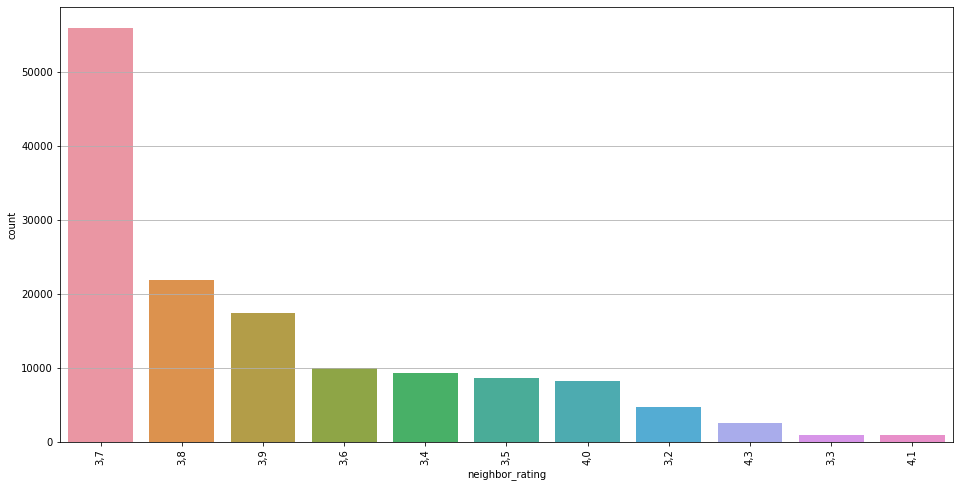

KIDS_RATING

3,9: 26029 / 18.51%
3,8: 69498 / 49.41%
4,1: 8266 / 5.88%
2,3: 2930 / 2.08%
4,0: 10243 / 7.28%
3,7: 5041 / 3.58%
3,4: 6345 / 4.51%
3,5: 2781 / 1.98%
3,6: 2817 / 2.0%
4,3: 4013 / 2.85%
4,2: 931 / 0.66%
3,1: 443 / 0.31%
4,5: 718 / 0.51%
4,4: 319 / 0.23%
3,3: 277 / 0.2%


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


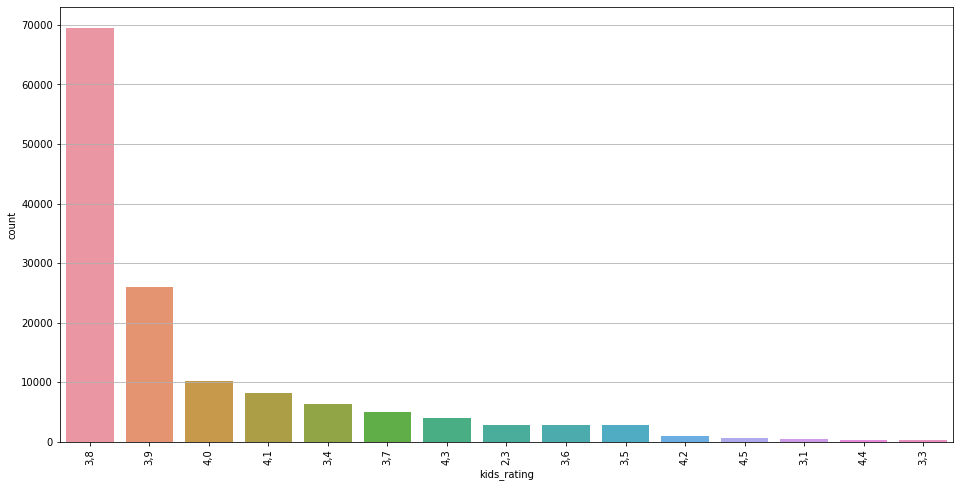

SPORT_REST_RATING

3,8: 11488 / 8.17%
3,2: 5960 / 4.24%
2,4: 4671 / 3.32%
2,9: 3754 / 2.67%
2,1: 2930 / 2.08%
3,7: 22907 / 16.29%
3,5: 59488 / 42.29%
4,1: 1566 / 1.11%
2,7: 859 / 0.61%
3,3: 3305 / 2.35%
3,1: 4291 / 3.05%
3,4: 5353 / 3.81%
3,6: 6864 / 4.88%
3,9: 3925 / 2.79%
4,0: 1241 / 0.88%
2,8: 1606 / 1.14%
3,0: 443 / 0.31%


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


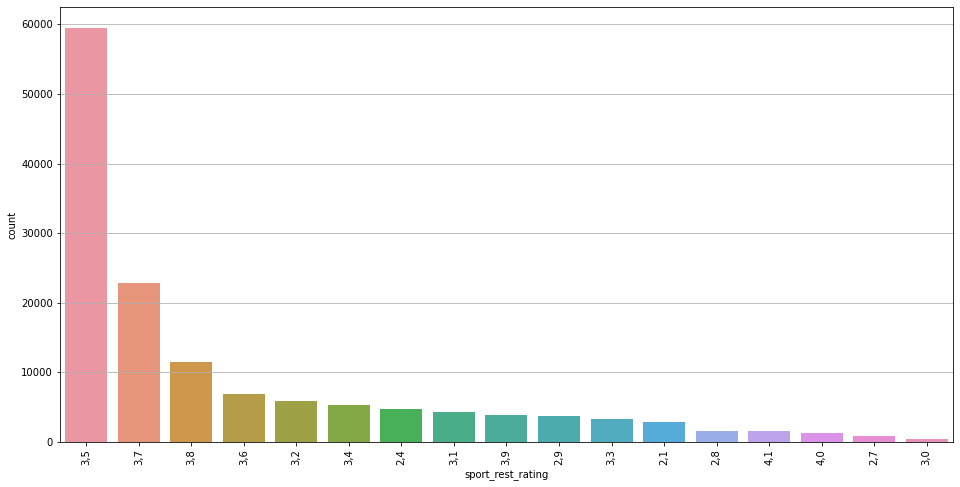

SHOP_RATING

4,5: 25502 / 18.13%
4,4: 9294 / 6.61%
3,5: 5890 / 4.19%
4,0: 3675 / 2.61%
4,6: 7180 / 5.1%
3,8: 3358 / 2.39%
4,3: 66609 / 47.36%
4,2: 10824 / 7.7%
3,3: 3062 / 2.18%
4,1: 5257 / 3.74%


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


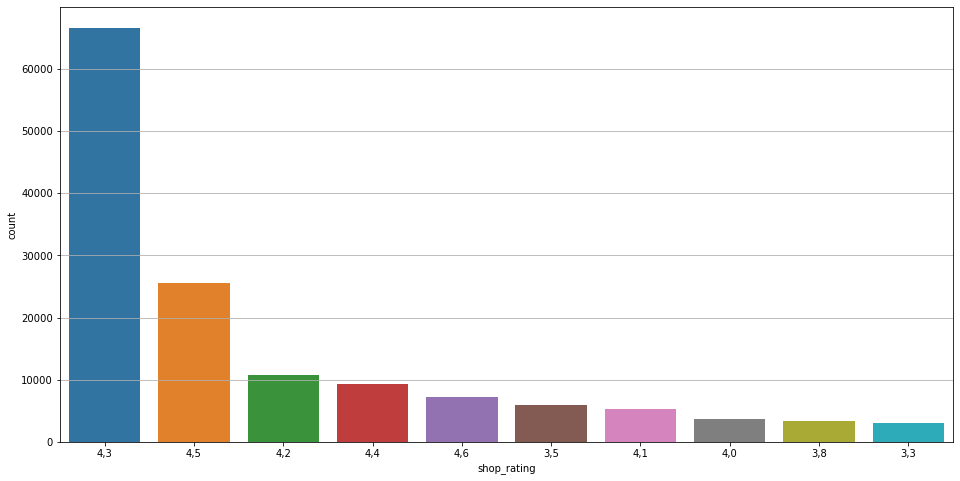

TRAFFIC_RATING

2,9: 9715 / 6.91%
2,8: 1169 / 0.83%
2,6: 8086 / 5.75%
3,3: 21787 / 15.49%
3,1: 16212 / 11.53%
2,4: 2930 / 2.08%
3,2: 56687 / 40.3%
3,5: 10870 / 7.73%
3,7: 4836 / 3.44%
2,7: 1235 / 0.88%
3,0: 4197 / 2.98%
3,4: 1968 / 1.4%
3,6: 241 / 0.17%
3,8: 718 / 0.51%


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


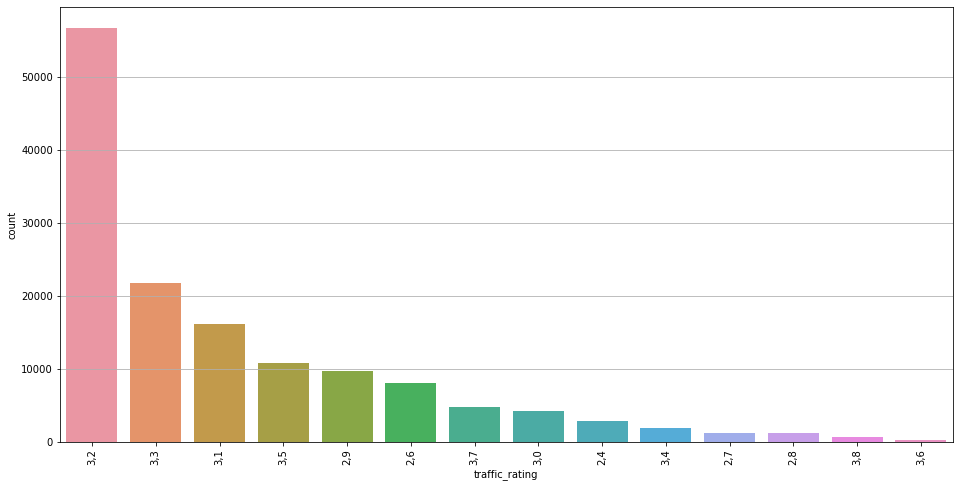

SECURE_RATING

3,7: 11451 / 8.14%
3,3: 5088 / 3.62%
2,9: 5396 / 3.84%
3,9: 5796 / 4.12%
3,4: 61519 / 43.74%
3,8: 21224 / 15.09%
3,2: 4704 / 3.34%
3,1: 1036 / 0.74%
3,0: 8160 / 5.8%
3,6: 7899 / 5.62%
3,5: 2920 / 2.08%
4,0: 3783 / 2.69%
2,8: 680 / 0.48%
4,2: 718 / 0.51%
2,6: 277 / 0.2%


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


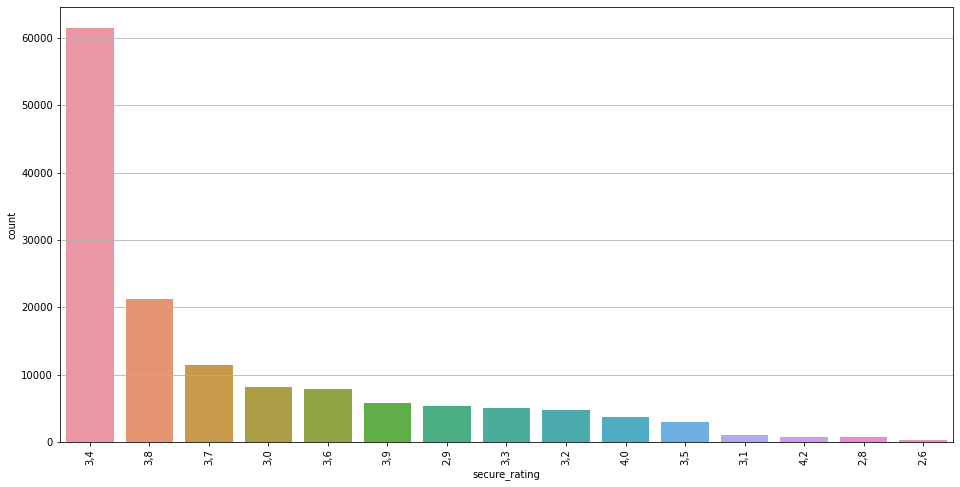

LIFE_PRICE_RATING

2,7: 11739 / 8.35%
2,5: 61236 / 43.54%
1,8: 4671 / 3.32%
2,4: 14873 / 10.57%
2,3: 4369 / 3.11%
2,6: 10279 / 7.31%
2,9: 4332 / 3.08%
2,8: 22674 / 16.12%
2,1: 489 / 0.35%
3,1: 3783 / 2.69%
2,2: 2206 / 1.57%


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


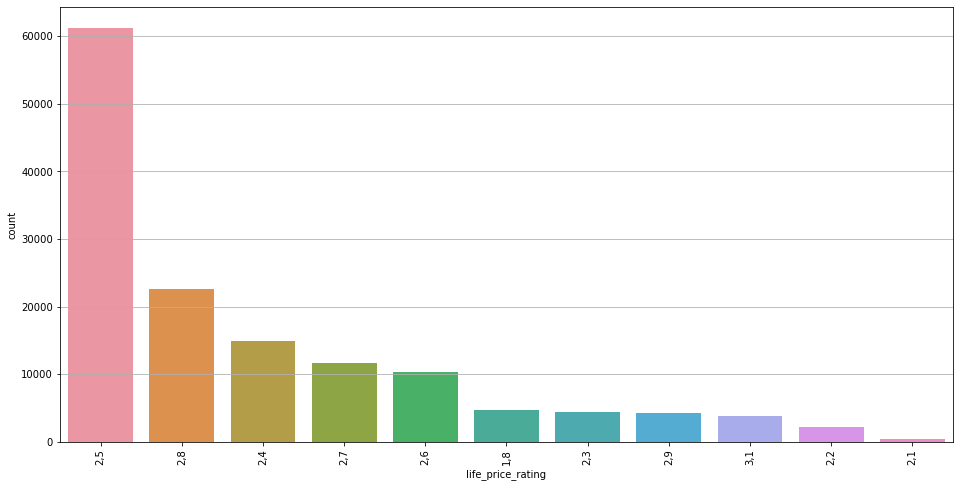

TOTAL_FLOORS

13: 9866 / 7.01%
10: 5144 / 3.66%
24: 10235 / 7.28%
20: 4791 / 3.41%
14: 7305 / 5.19%
4: 4527 / 3.22%
5: 9532 / 6.78%
25: 9989 / 7.1%
9: 9820 / 6.98%
12: 10571 / 7.52%
22: 3308 / 2.35%
15: 6306 / 4.48%
16: 8187 / 5.82%
19: 2553 / 1.82%
8: 6044 / 4.3%
11: 4014 / 2.85%
21: 1493 / 1.06%
23: 4376 / 3.11%
3: 1140 / 0.81%
17: 5874 / 4.18%
6: 2785 / 1.98%
18: 5644 / 4.01%
28: 359 / 0.26%
27: 967 / 0.69%
30: 17 / 0.01%
26: 2711 / 1.93%
2: 387 / 0.28%
7: 2210 / 1.57%
29: 384 / 0.27%
32: 41 / 0.03%
1: 12 / 0.01%
35: 36 / 0.03%
36: 14 / 0.01%
34: 4 / 0.0%
33: 3 / 0.0%
44: 1 / 0.0%
31: 1 / 0.0%


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


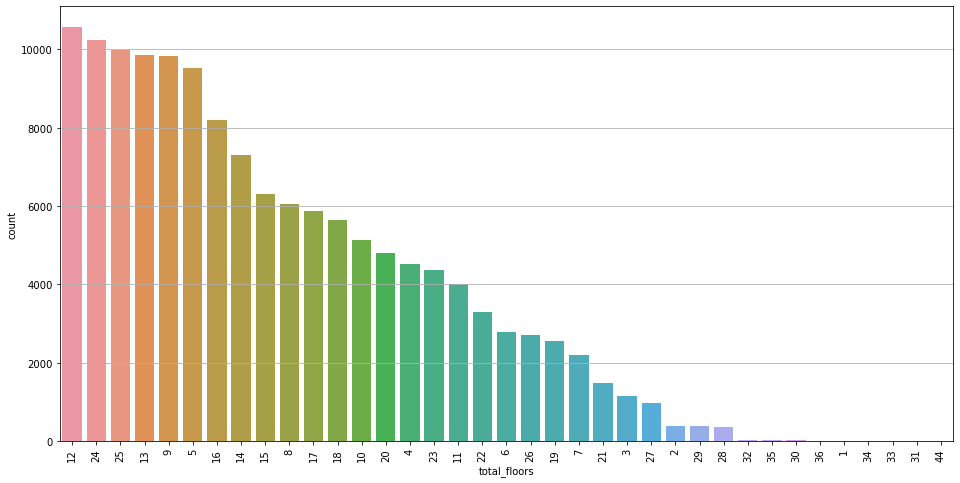

METRO_STATION

Комендантский проспект: 14673 / 10.43%
Площадь Ленина: 1543 / 1.1%
Пролетарская: 4738 / 3.37%
Ладожская: 2164 / 1.54%
Лен. область: 6821 / 4.85%
Пионерская: 1846 / 1.31%
Проспект Просвещения: 3506 / 2.49%
Площадь Мужества: 1029 / 0.73%
Академическая: 6112 / 4.35%
Проспект Большевиков: 915 / 0.65%
Спортивная: 417 / 0.3%
Лесная: 5192 / 3.69%
Елизаровская: 5800 / 4.12%
Удельная: 1604 / 1.14%
Беговая: 1329 / 0.94%
Звездная: 6366 / 4.53%
Ломоносовская: 991 / 0.7%
Выборгская: 760 / 0.54%
Крестовский остров: 2473 / 1.76%
Обухово: 927 / 0.66%
Проспект Ветеранов: 1913 / 1.36%
Парнас: 8201 / 5.83%
Гражданский проспект: 4293 / 3.05%
Сергиево (Володарская): 3728 / 2.65%
Московская: 2251 / 1.6%
Сосновая Поляна: 3619 / 2.57%
Ручьи: 607 / 0.43%
Черная речка: 3328 / 2.37%
Площадь А. Невского: 723 / 0.51%
Улица Дыбенко: 3420 / 2.43%
Рыбацкое: 1111 / 0.79%
Горелово: 1610 / 1.14%
Новочеркасская: 2691 / 1.91%
Горьковская: 299 / 0.21%
Приморская: 6123 / 4.35%
Купчино: 2750 / 1.96%
Бухарестск

C:\Users\mi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


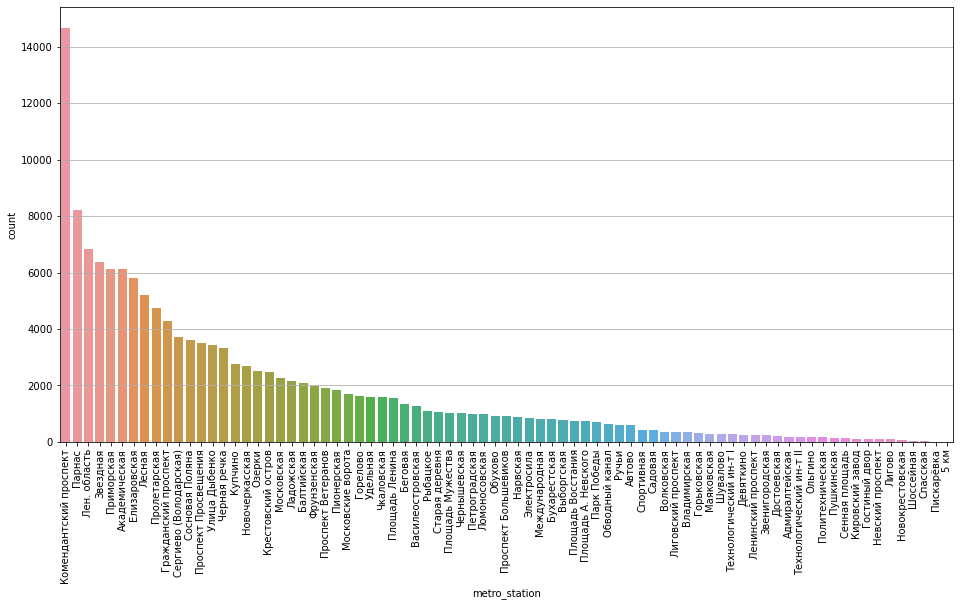

UNDERGROUND

3000 - 4000: 21082 / 14.99%
2000 - 3000: 20243 / 14.39%
0 - 1000: 39800 / 28.3%
> 5000: 6821 / 4.85%
1000 - 2000: 38139 / 27.12%
4000 - 5000: 14566 / 10.36%


C:\Users\mi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


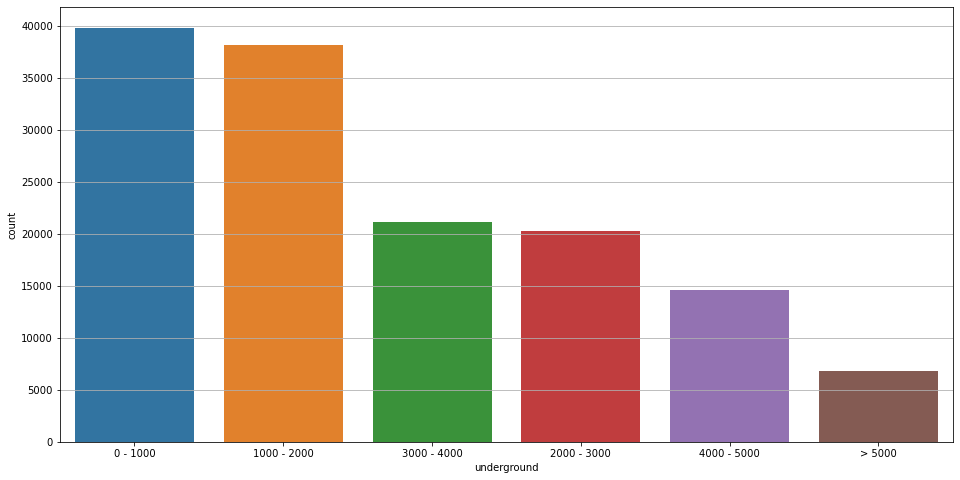

In [52]:
cat_visualization(df, cat_features)

**flat_type** - Больше всего объявлений о продаже квартир, на втором месте студии. Жилое помещение с свободной планировкой очень мало относительно всего объема данных. Удалю их.

**rooms** - Объявлений с 7, 8, 9 комнатами и свободной планировкой ~200. Меньше 1% относительно всего объема данных. Нет смысла с ними возиться. Удаляем. Объявления с одной комнатой могут быть как квартирами так и студиями. Взглянем на соотношение.

C:\Users\mi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


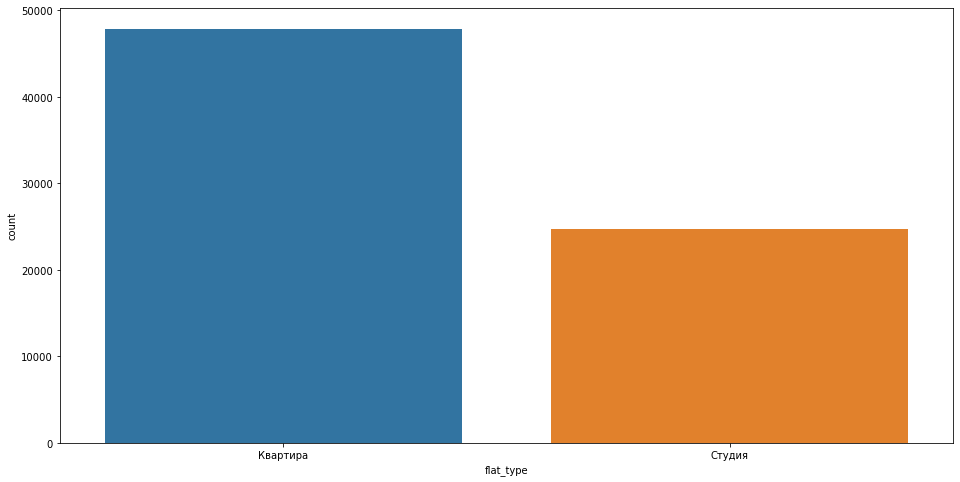

In [53]:
fig = plt.figure(figsize=(16, 8))
sns.countplot(df['flat_type'][df['rooms']=='1'])
plt.show()

Однокомнатных квартир в два раза больше чем студий.

**floors** - Объявлений квартиры которых расположены на 26-33 этажах ~100. Удаляем.

**build_matireal** - Блоки и дерево ~300. Удаляем.

**district** - Колпинский, Всеволожский, Петродворцовый, Пушкинский районы находятся на чертой города, без доступа к метро. Объявлений в Всеволожском, Петродворцовом района в сумме меньше 1%. Возможно стоит попробвать объеденить их в одну категорию "Лен. область".

**total_floors** - Объявлений с общим количеством этажей 1, 30, 31, 32, 33, 34, 35, 36 в сумме меньше 1%. Удаляем.

**metro_station** - 5км и Пискаревка. Таких станций метро нет. Всего 3 объявления. Удаляем.

## barplot

**Посмотрим на связь категориальных признаков и таргета.**

In [54]:
def target_cat_rel(df, cat_features):
    
    """ Отношение категориальных признаков к таргету. """

    for cat in cat_features:
    
        fig = plt.figure(figsize=(16, 8))
        plt.xticks(rotation=90)
        sns.barplot(x=cat, y='price', data=df, order=df.groupby([cat]).mean().sort_values('price', ascending=False).index)
        plt.show()

In [55]:
cat_features = ['flat_type', 'object_type', 'rooms', 'floors',
                'build_matireal', 'district', 'total_floors', 
                'metro_station', 'underground'] 

In [56]:
# Удаляем все выше перечисленные категории.
# flat_type - Своб. планировка.
df_correct = df.drop(df[df['flat_type'] == 'Своб. планировка'].index)
# rooms - Своб. планировка, 7, 8, 9.
df_correct.drop(df_correct[(df_correct['rooms'] == 'Своб. планировка') | (df_correct['rooms'] == '7') | \
                   (df_correct['rooms'] == '8') | (df_correct['rooms'] == '9')].index, inplace=True)
# floors - 26 - 35.
df_correct.drop(df_correct[(df_correct['floors'] == '26') | (df_correct['floors'] == '27') | \
                   (df_correct['floors'] == '28') | (df_correct['floors'] == '29') | \
                   (df_correct['floors'] == '30') | (df_correct['floors'] == '31') | \
                   (df_correct['floors'] == '32') | (df_correct['floors'] == '33') | \
                   (df_correct['floors'] == '34') | (df_correct['floors'] == '35')].index, inplace=True)
# build_matireal - блоки, дерево.
df_correct.drop(df_correct[(df_correct['build_matireal'] == 'Блоки') | \
                           (df_correct['build_matireal'] == 'Дерево')].index, inplace=True)
# total_floors - 1, 30 - 36.
df_correct.drop(df_correct[(df_correct['total_floors'] == '1') | (df_correct['total_floors'] == '30') | \
                   (df_correct['total_floors'] == '31') | (df_correct['total_floors'] == '32') | \
                   (df_correct['total_floors'] == '33') | (df_correct['total_floors'] == '34') | \
                   (df_correct['total_floors'] == '35') | (df_correct['total_floors'] == '36')].index, inplace=True)
# metro_station - 5км, Пискаревка.
df_correct.drop(df_correct[(df_correct['metro_station'] == '5 км') | \
                           (df_correct['metro_station'] == 'Пискарёвка')].index, inplace=True)

In [57]:
df.shape

(140651, 29)

In [58]:
df_correct.shape

(139147, 29)

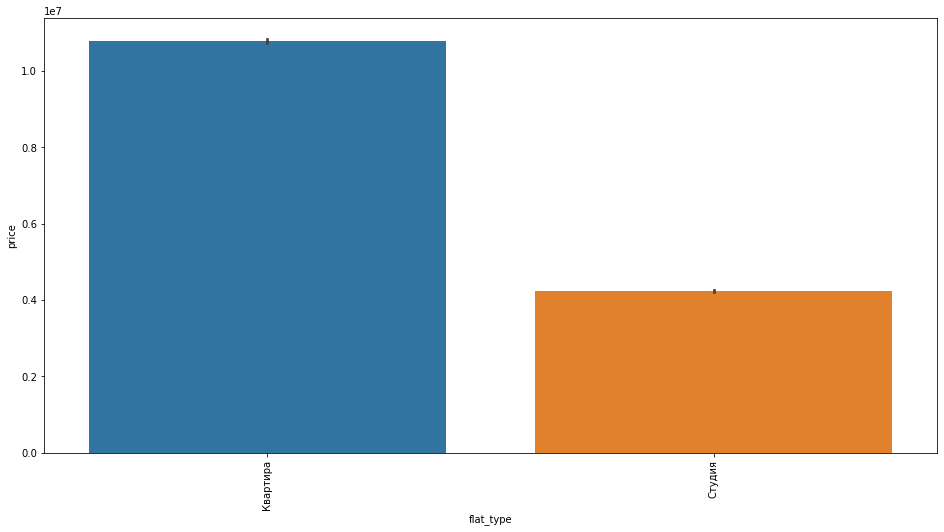

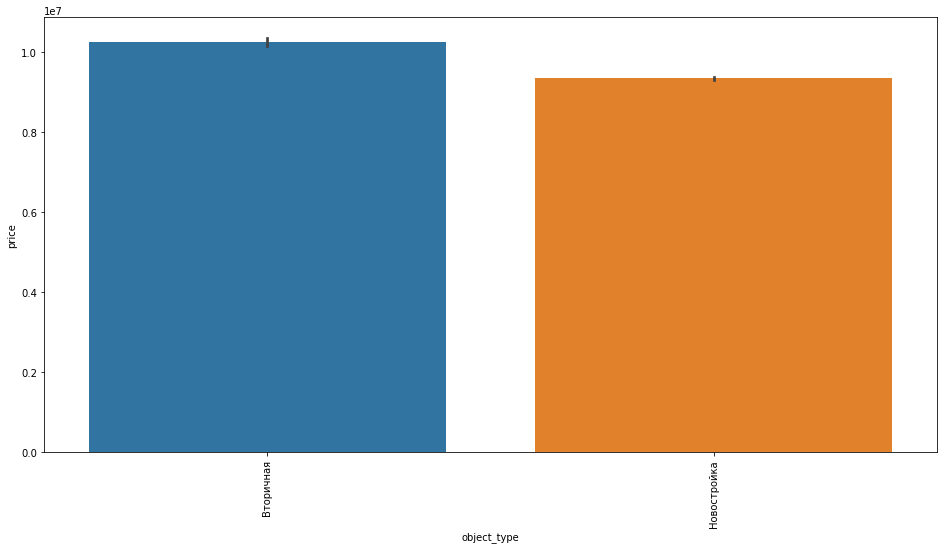

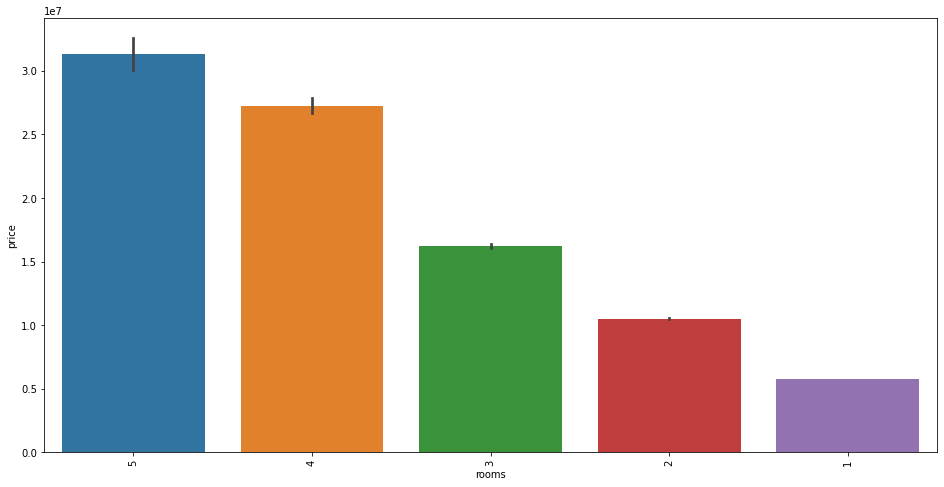

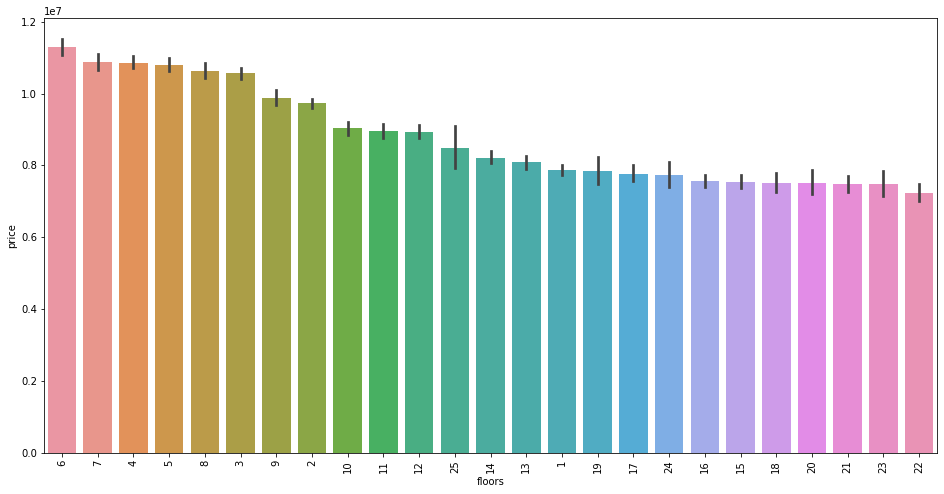

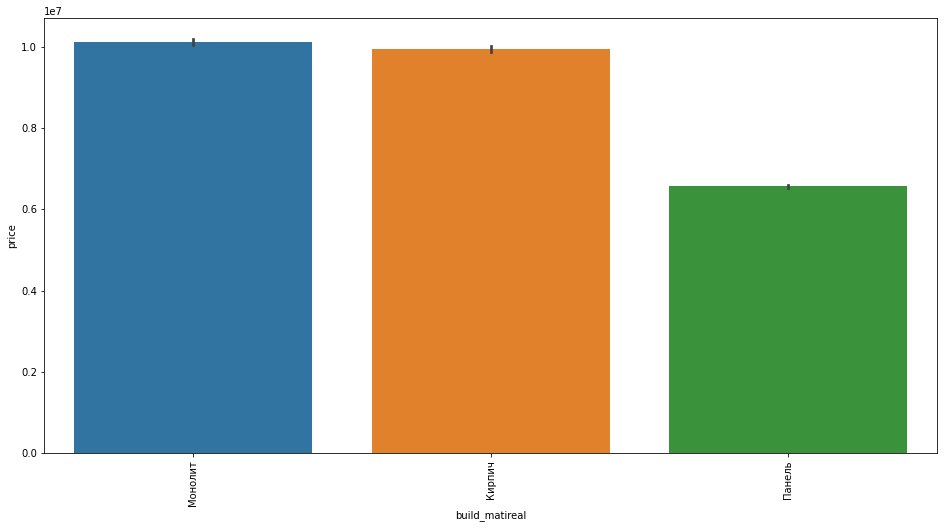

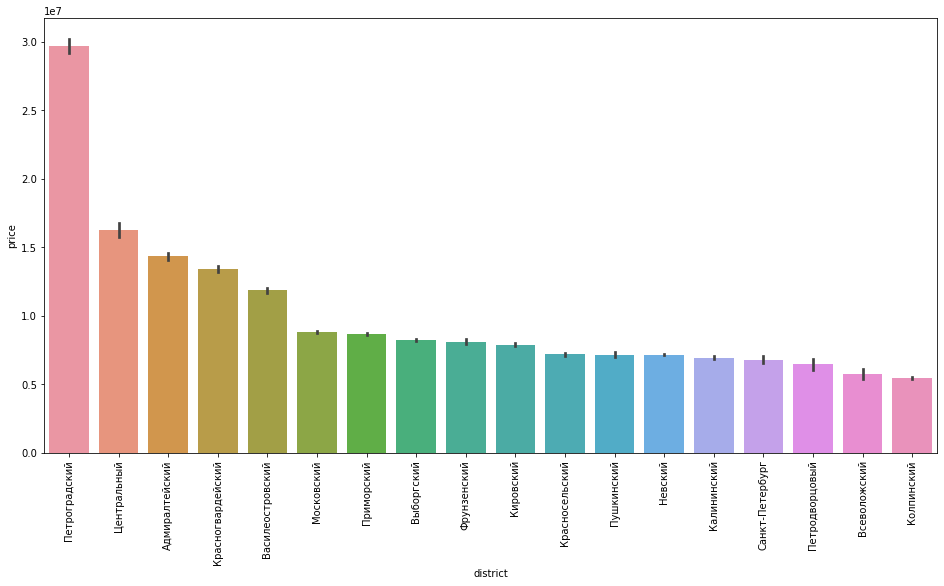

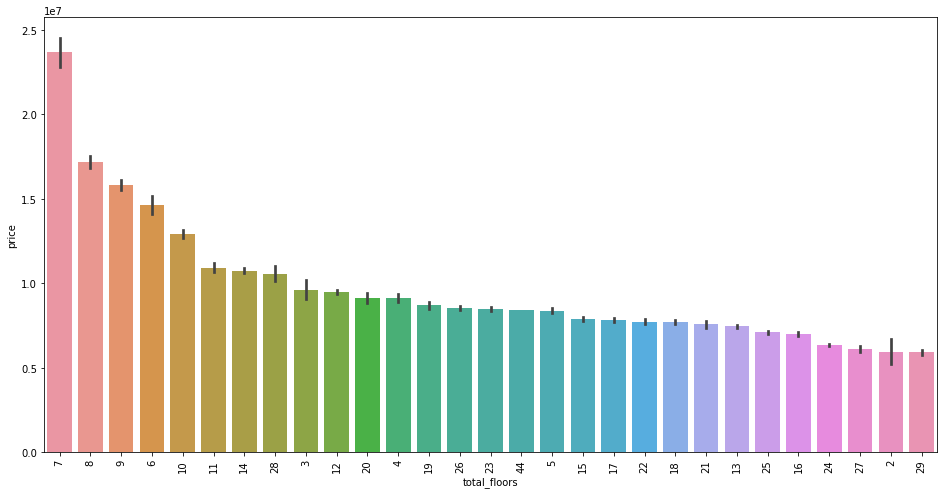

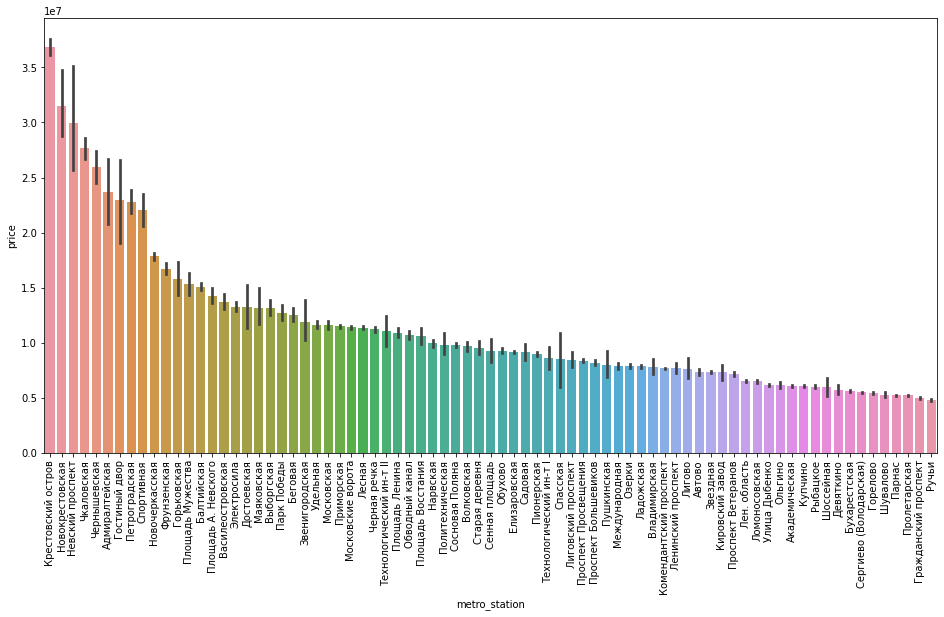

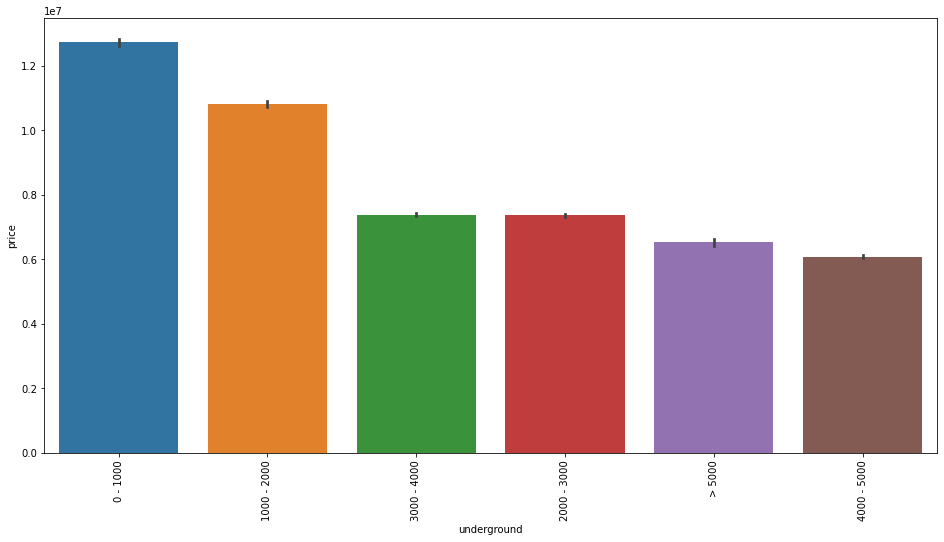

In [59]:
target_cat_rel(df_correct[(df_correct['square']<401) & (df_correct['price']<100000000)], cat_features)

Здесь все достаточно логично, аномалий не наблюдается.

# Naive model

Построю наивную модель, которая предсказывает среднюю цену по количеству комнат и району. Это будет модель, с которой можно будет сравнивать последующие.

In [60]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

In [61]:
# split данных. Данные которые изначально помечены как тестовые в модели не участвуют.
df_train, df_test = train_test_split(df[df['sample'] == 1], test_size=0.15, shuffle=True, random_state=42)

predicts = []
for index, row in pd.DataFrame(df_test[['rooms', 'district']]).iterrows():
    query = f"rooms == '{row[0]}' and district == '{row[1]}'"
    predicts.append(df_train.query(query)['price'].median())

# заполняем не найденные совпадения
predicts = pd.DataFrame(predicts)
predicts = predicts.fillna(predicts.median())

print(f"Наивная модель MAPE: {(mape(df_test['price'], predicts.values[:, 0]))*100:0.2f}%") 

Наивная модель MAPE: 28.50%


# Выводы

## Ручной EDA

**Признаки.**

Всего **29** признаков, включая таргет. Из них **24** категориальных и **5** числовых.

**Пропуски.**

Пропуски имеются всего лишь в двух признаках `kitchen_square` и `live_sqaure`. В обоих случаях пропущенно > 50% данных. Можно попробовать несколько вариантов решения данной проблемы:
- `kitchen_square` и `live_sqaure` по сути своей являются частью признака `square`, поэтому как вариант можно просто удалить эти два признака.
- Во всех объявлениях данные пропущены по разному, где-то нет `kitchen_square`, а где-то `live_sqaure`. В признаке `square` пропусков нет, поэтому можно попробовать вычеслить недостающие данные, используя два других признака, т.е. вычесть из `square` имеющийся признак и получить недостающий.
- Использовать в данном случае базове приемы, такие как заполнение средним, медианой или модой считаю не целесообразным, но можно вычеслить сколько в среднем, в процентом соотношении занимает каждая площадь и на основе этих данных заполнить пропуски.

**Выбросы.**

Без предворительной фильтрации есть несколько явных выбросов. Либо слишком большая цена при прочих вводных, либо слшиком болльшая площадь. От этих данных предлагаю просто избавится, так как их < 10. При таком объеме данных (> 100000 объявлений) мы ничего не потеряем, но если их оставить они могут оказать влияние на качество модели.

Оставшиеся данные предлагаю поделить на два этапа:

- Оставить объявления с площадью до 400 м2.
- Оставить объявления с площадью до 130 м2.

**Новые признаки.**

На основе данных о районе можно добавить новые признаки из внешних источников, например кол-во школ, поликлиник и т.д.

**Имеющиеся признаки.**

Имеет смысл сократить количество категорий в некоторых категориальных признаках (`flat_type`, `rooms`, `floors`, `build_matireals`, `total_floors`, `metro_station`), так как есть категории в которых слишком мало строк ( <10) и относительно всего объема данных это очень маленький процент.